# Cause Of Deaths Around The World

##### Trong đồ án này, nhóm chúng em xin phép được trình bày một quy trình Khoa Học Dữ Liệu với dataset về những nguyên nhân gây tử vong vòng quanh thế giới, tiền xử lý dữ liệu, đưa ra các câu hỏi, phân tích và đánh giá.

Link Dataset: https://www.kaggle.com/datasets/iamsouravbanerjee/cause-of-deaths-around-the-world?resource=download

# Import các thư viện cần thiết

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set_theme()

# Khám phá dữ liệu

### Đọc dữ liệu từ .csv vào dataframe

Sau khi giải nén bộ dữ liệu đã khám phá ở link trên, chúng ta sẽ được một file "cause_of_deaths.csv"

Chúng ta sẽ tiến hành đọc dữ liệu vào một DataFrame tên là cause_of_deaths_df

In [2]:
cause_of_deaths_df = pd.read_csv("cause_of_deaths.csv")
cause_of_deaths_df.head()

,Country/Territory,Code,Year,Meningitis,Alzheimer's Disease and Other Dementias,Parkinson's Disease,Nutritional Deficiencies,Malaria,Drowning,Interpersonal Violence,...,Diabetes Mellitus,Chronic Kidney Disease,Poisonings,Protein-Energy Malnutrition,Road Injuries,Chronic Respiratory Diseases,Cirrhosis and Other Chronic Liver Diseases,Digestive Diseases,"Fire, Heat, and Hot Substances",Acute Hepatitis
0,Afghanistan,AFG,1990,2159,1116,371,2087,93,1370,1538,...,2108,3709,338,2054,4154,5945,2673,5005,323,2985
1,Afghanistan,AFG,1991,2218,1136,374,2153,189,1391,2001,...,2120,3724,351,2119,4472,6050,2728,5120,332,3092
2,Afghanistan,AFG,1992,2475,1162,378,2441,239,1514,2299,...,2153,3776,386,2404,5106,6223,2830,5335,360,3325
3,Afghanistan,AFG,1993,2812,1187,384,2837,108,1687,2589,...,2195,3862,425,2797,5681,6445,2943,5568,396,3601
4,Afghanistan,AFG,1994,3027,1211,391,3081,211,1809,2849,...,2231,3932,451,3038,6001,6664,3027,5739,420,3816


### Kiểm tra số dòng và số cột của dữ liệu

Kiểm tra số dòng và số cột của dữ liệu, sau đó lưu vào hai biến tên là num_cols và num_rows

In [75]:
def countCols(df):
    result = len(df.axes[1])
    return result

def countRows(df):
    result = len(df.axes[0])
    return result

num_cols = countCols(cause_of_deaths_df)
num_rows = countRows(cause_of_deaths_df)


## Mỗi một cột ( thuộc tính ) có ý nghĩa như thế nào ?

Theo như mô tả của dữ liệu trên kaggle, thì chúng ta có một số dòng dữ liệu cần lưu ý như sau

01. Country/Territory - Tên của nước trên dòng dữ liệu đó

02. Code - Mã của các nước tương ứng

03. Year - Năm diễn ra khi thu thập thông số

Và các cột thứ 4 -> 32 là số người tử vong với nguyên nhân tử vong tương ứng

## Chúng ta sẽ liệt kê các nguyên nhân tử vong này là gì

Liệt kê tất cả các loại nguyên nhân và lưu vào biến names_cause


In [76]:
names_cause = pd.Series(cause_of_deaths_df.columns.values[3:])
names_cause

0                                     Meningitis
1        Alzheimer's Disease and Other Dementias
2                            Parkinson's Disease
3                       Nutritional Deficiencies
4                                        Malaria
5                                       Drowning
6                         Interpersonal Violence
7                             Maternal Disorders
8                                       HIV/AIDS
9                             Drug Use Disorders
10                                  Tuberculosis
11                       Cardiovascular Diseases
12                  Lower Respiratory Infections
13                            Neonatal Disorders
14                         Alcohol Use Disorders
15                                     Self-harm
16                  Exposure to Forces of Nature
17                            Diarrheal Diseases
18          Environmental Heat and Cold Exposure
19                                     Neoplasms
20                  

## Mỗi cột hiện đang có kiểu dữ liệu gì? Có cột nào có kiểu dữ liệu không phù hợp không?

Lấy kiểu dữ liệu của các cột và lưu vào series cols_dtype

In [77]:
cols_name = list(cause_of_deaths_df.columns.values)
cols_dtype = pd.Series(cause_of_deaths_df[cols_name].dtypes)
cols_dtype

Country/Territory                             object
Code                                          object
Year                                           int64
Meningitis                                     int64
Alzheimer's Disease and Other Dementias        int64
Parkinson's Disease                            int64
Nutritional Deficiencies                       int64
Malaria                                        int64
Drowning                                       int64
Interpersonal Violence                         int64
Maternal Disorders                             int64
HIV/AIDS                                       int64
Drug Use Disorders                             int64
Tuberculosis                                   int64
Cardiovascular Diseases                        int64
Lower Respiratory Infections                   int64
Neonatal Disorders                             int64
Alcohol Use Disorders                          int64
Self-harm                                     

### Nhận xét kiểu dữ liệu 

Ta có các kiểu từ Year cho tới các kiểu dữ liệu số lượng người tử vong về một nguyên nhân nào đó thuộc kiểu dữ liệu int và là numercial

Chúng ta sẽ cần tìm hiểu cụ thể kiểu dữ liệu của Country/Territory và Code là gì

Ta sẽ viết một hàm để tìm hiểu kỹ hơn kiểu dữ liệu của cột trên, ở đây chúng ta sẽ sử dụng phương thức apply để làm.

In [78]:
def open_object_dtype(s):
    dtypes = set()
    
    #Ta sẽ append lần lượt các type của từng s[i] vào trong set
    ##Thì chắc chắn rằng bên trong dtypes sẽ chỉ có một kiểu duy nhất, cho nên rằng set này chỉ chứa 1 phần tử
    
    ##Chúng ta lấy ra một series dùng apply với hàm type lên tất cả các s[i]
    object_series = s.apply(type)
    
    ##Sau đó dùng chính hàm dtypes.add để apply vô series object_series vừa xử lý xong
    object_series.apply(dtypes.add)
    return dtypes

type_of_country = open_object_dtype(cause_of_deaths_df['Country/Territory'])
type_of_code = open_object_dtype(cause_of_deaths_df['Code'])

### Nhận xét kiểu dữ liệu object

Vậy ta có thể thấy rằng, kiểu dữ liệu của hai cột Country/Territory và Code là string, vậy rằng trong bộ dữ liệu này chúng ta sẽ không cần phải tiền xử lý/ chuẩn hóa dữ liệu lại để có thể thực hiện các câu hỏi

## Có dòng nào bị lặp hay không ?

Ta xác định trong DataFrame có dòng nào bị lặp không để tiến hành lọc và đưa ra các nhận xét. Lưu kết quả ở trong biến have_duplicated_rows, trả về true nếu như có các dòng bị lặp, trả về false nếu như không có dòng nào bị lăp

In [79]:
temp = np.array(cause_of_deaths_df.duplicated())

##Check xem có tồn tại phần tử nào là True hay không, nếu không có bất kỳ một phần tử nào là true thì trả về False
have_duplicated_rows = np.any(temp)
have_duplicated_rows

False

Vậy rằng không có dòng nào trong đây bị lặp, các dữ liệu hoàn toàn độc lập với nhau

### Kiểm tra xem trong các cột có dữ liệu thuộc kiểu Numercial có dữ liệu nào bị thiếu hay là không

Ta sẽ kiểm tra xem trong lần lượt các cột số lượng người tử vong với các nguyên nhân tương ứng xem có giá trị nào trong đó bị thiếu không. Ta cần kiểm tra thông số này để đưa ra hướng giải quyết tiêp theo xem liệu rằng ta có nên kiểm tra tỉ lệ phần trăm dữ liệu bị thiếu và lần lượt đưa ra các kiểm tra cho phân bố dữ liệu. Kết quả lưu vào biến numberOfMissing

In [80]:
def countMissingNumber(arr):
    return np.count_nonzero(np.isnan(arr))

numberOfMissing = countMissingNumber(cause_of_deaths_df[names_cause])

## Trong bộ dữ liệu có bao nhiêu đất nước được khảo sát ? Có đất nước Việt Nam được khảo sát ở đây không ?

Ta sẽ kiểm tra xem trong bộ dữ liệu có bao nhiêu đất nước và có tồn tại đất nước Việt Nam không, lưu kết quả lần lượt ở trong 2 biến num_countries (Integer) và isContainsVietnam (bool)

In [81]:
##Lấy series Country ra và đếm số lượng các nước riêng biệt trong bộ dữ liệu
countries_series = cause_of_deaths_df['Country/Territory']
countries_unique = np.unique(countries_series)
num_countries = len(np.unique(countries_unique))

isContainsVietnam = len(countries_unique[countries_unique == 'Vietnam']) != 0

print(num_countries, isContainsVietnam)


204 True


Vậy rằng bộ dữ liệu ở đây có 204 quốc gia và có tồn tại sự khảo sát của đất nước Việt Nam

## Các năm được khảo sát trong bộ dữ liệu trải dài từ năm mấy tới năm mấy ?

Liệt kê trong bộ dữ liệu các năm trải dài từ năm bao nhiêu tới năm bao nhiêu, lưu kết quả vô 3 biến years, min_years, max_years



In [82]:
years = np.unique(cause_of_deaths_df['Year'])

min_years = min(years)
max_years = max(years)

print(years,min_years,max_years)


[1990 1991 1992 1993 1994 1995 1996 1997 1998 1999 2000 2001 2002 2003
 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013 2014 2015 2016 2017
 2018 2019] 1990 2019


### Vậy rằng trong bộ dữ liệu này thực hiện khảo sát từ năm 1990 tới năm 2019, tổng cộng là 30 năm, vậy câu hỏi đặt ra là có nước nào không có đủ dữ liệu trải dài từ năm 1990 tới năm 2019 không ?

Liệt kê danh sách tất cả các nước mà không đủ dữ liệu trải dài từ năm 1990 tới năm 2019, lưu vào Series not_full_years_countries và số lượng vào biến not_full_years_countries_count



In [83]:
## Ý tưởng : Nhờ nhận xét rằng mỗi dòng đều khác biệt nhau, cho nên rằng miễn là số dòng của một nước là 30 thì
## thì nước đó sẽ cover đủ dữ liệu từ năm 1990 tới năm 2019

## Tách cá
count_count_df = cause_of_deaths_df.value_counts('Country/Territory')
not_full_years_countries = pd.Series(count_count_df[count_count_df < 30])
not_full_years_countries_count = len(not_full_years_countries)

Hmmm... Vậy chúng ta có thể thấy rằng, ở đây tất cả các nước đều có đầy đủ dữ liệu từ năm 1990 tới năm 2019

## Với mỗi loại nguyên nhân tử vong, số lượng người tử vong nhiều nhất và ít nhất của từng nguyên nhân đó là bao nhiêu trong tất cả các năm khảo sát ?

Ở đây chúng ta sẽ dùng vòng lặp để lặp qua tên các loại nguyên nhân (đã thu thập ở trên) để lấy được từng Series của từng loại nguyên nhân, chi phí cho vòng lặp này là rất nhỏ ( bằng với số lượng cột Numercial là 30 lần )

Dữ liệu của từng nguyên nhân sẽ được lưu trong một dictionary cause_death_profile với key là tên nguyên nhân và value là list chứa 2 phần từ là số lượng min và max người tử vong về nguyên nhân đó

In [84]:
##Ta có biến names_cause chứa số lượng nguyên nhân các loại bệnh

def getMin(arr):
    return arr.min()
    
    
def getMax(arr):
    return arr.max()

cause_death_profile = {}

for name_cause in names_cause:
    cause_Series = cause_of_deaths_df[name_cause]
    cause_num_min = getMin(cause_Series)
    cause_num_max = getMax(cause_Series)
    cause_death_profile[name_cause] = [cause_num_min,cause_num_max]
    
cause_death_profile
    

{'Meningitis': [0, 98358],
 "Alzheimer's Disease and Other Dementias": [0, 320715],
 "Parkinson's Disease": [0, 76990],
 'Nutritional Deficiencies': [0, 268223],
 'Malaria': [0, 280604],
 'Drowning': [0, 153773],
 'Interpersonal Violence': [0, 69640],
 'Maternal Disorders': [0, 107929],
 'HIV/AIDS': [0, 305491],
 'Drug Use Disorders': [0, 65717],
 'Tuberculosis': [0, 657515],
 'Cardiovascular Diseases': [4, 4584273],
 'Lower Respiratory Infections': [0, 690913],
 'Neonatal Disorders': [0, 852761],
 'Alcohol Use Disorders': [0, 55200],
 'Self-harm': [0, 220357],
 'Exposure to Forces of Nature': [0, 222641],
 'Diarrheal Diseases': [0, 1119477],
 'Environmental Heat and Cold Exposure': [0, 29048],
 'Neoplasms': [1, 2716551],
 'Conflict and Terrorism': [0, 503532],
 'Diabetes Mellitus': [1, 273089],
 'Chronic Kidney Disease': [0, 222922],
 'Poisonings': [0, 30883],
 'Protein-Energy Malnutrition': [0, 202241],
 'Road Injuries': [0, 329237],
 'Chronic Respiratory Diseases': [1, 1366039],
 'C

# Đưa ra các câu hỏi cần trả lời

***Câu 1:*** *Căn bệnh nào chiếm tỷ lệ cao nhất vào năm 2019? Và căn bệnh đó biến đổi theo từng năm như thế nào ?*

***Câu 2:*** *Tổng số lượng người tử vong qua từng năm sẽ như thế nào ? Số lượng người tử vong theo từng loại bệnh theo từng năm như thế nào ? có biểu đồ nào để visualize sự thay đổi này không?*

***Câu 3:*** *Tổng số lượng người tử vong nhiều nhất của từng năm là thuộc về nước nào ? Có thể đưa ra được biểu đồ phân bố ?*

***Câu 4:*** *Với từng năm, bệnh nào có tổng số người tử vong nhiều nhất ? Liệt kê ra top 5 mỗi năm*

***Câu 5:*** Hãy phân tích về tỉ lệ tử vong của Việt Nam bằng cách trả lời những câu hỏi sau đây:

- *Tổng số người tử vong ở Việt Nam trong khảo sát này từ năm 1990-2019? Từ đó ta có nhận xét gì?*
- *Kể tên các nguyên nhân bệnh gây tử vong phổ biến nhất của Việt Nam từ 1990 tới 2019? Nhận xét về các nguyên nhân này?*
- *Tỉ lệ các nguyên nhân tử vong của Việt Nam so với mặt bằng chung thế giới như thế nào ? Visualize biểu đồ so sánh ?*

***Câu 6:*** *Hãy nhận xét về tỉ lệ các bệnh không lây nhiễm và các bệnh lây nhiễm trong thời gian từ 1990 đến 2019. Từ đó hãy đưa ra kết luận.*

***Câu 7:*** *...*

***Câu 8:*** *Có thể áp dụng mô hình dự đoán nào không ???*






# Câu 1: Căn bệnh nào chiếm tỷ lệ cao nhất vào năm 2019 ? Và căn bệnh đó biến đổi theo từng năm như thế nào ?

In [85]:
#Lấy những dòng dữ liệu của năm 2019
mask = cause_of_deaths_df['Year'] == 2019 
df = cause_of_deaths_df[mask]

In [86]:
#Tính tổng ca tử vong trong năm 2019 trên toàn thế giới
cause_of_deaths_total = []

def countSumCauseOfDeaths(cols): #Hàm tính tổng
    total = cols.sum()
    return total

#Duyệt qua từng cột ứng với từng bệnh và tính tổng, lưu vào list cause_of_deaths_total
for cols in df.columns[3:]:
    column = df[cols]
    cause_of_deaths_total.append(countSumCauseOfDeaths(column))

label = np.array(df.columns[3:]) #List chứa tên từng bệnh

Vẽ biểu đồ đường thể hiện số lượng ca tử vong

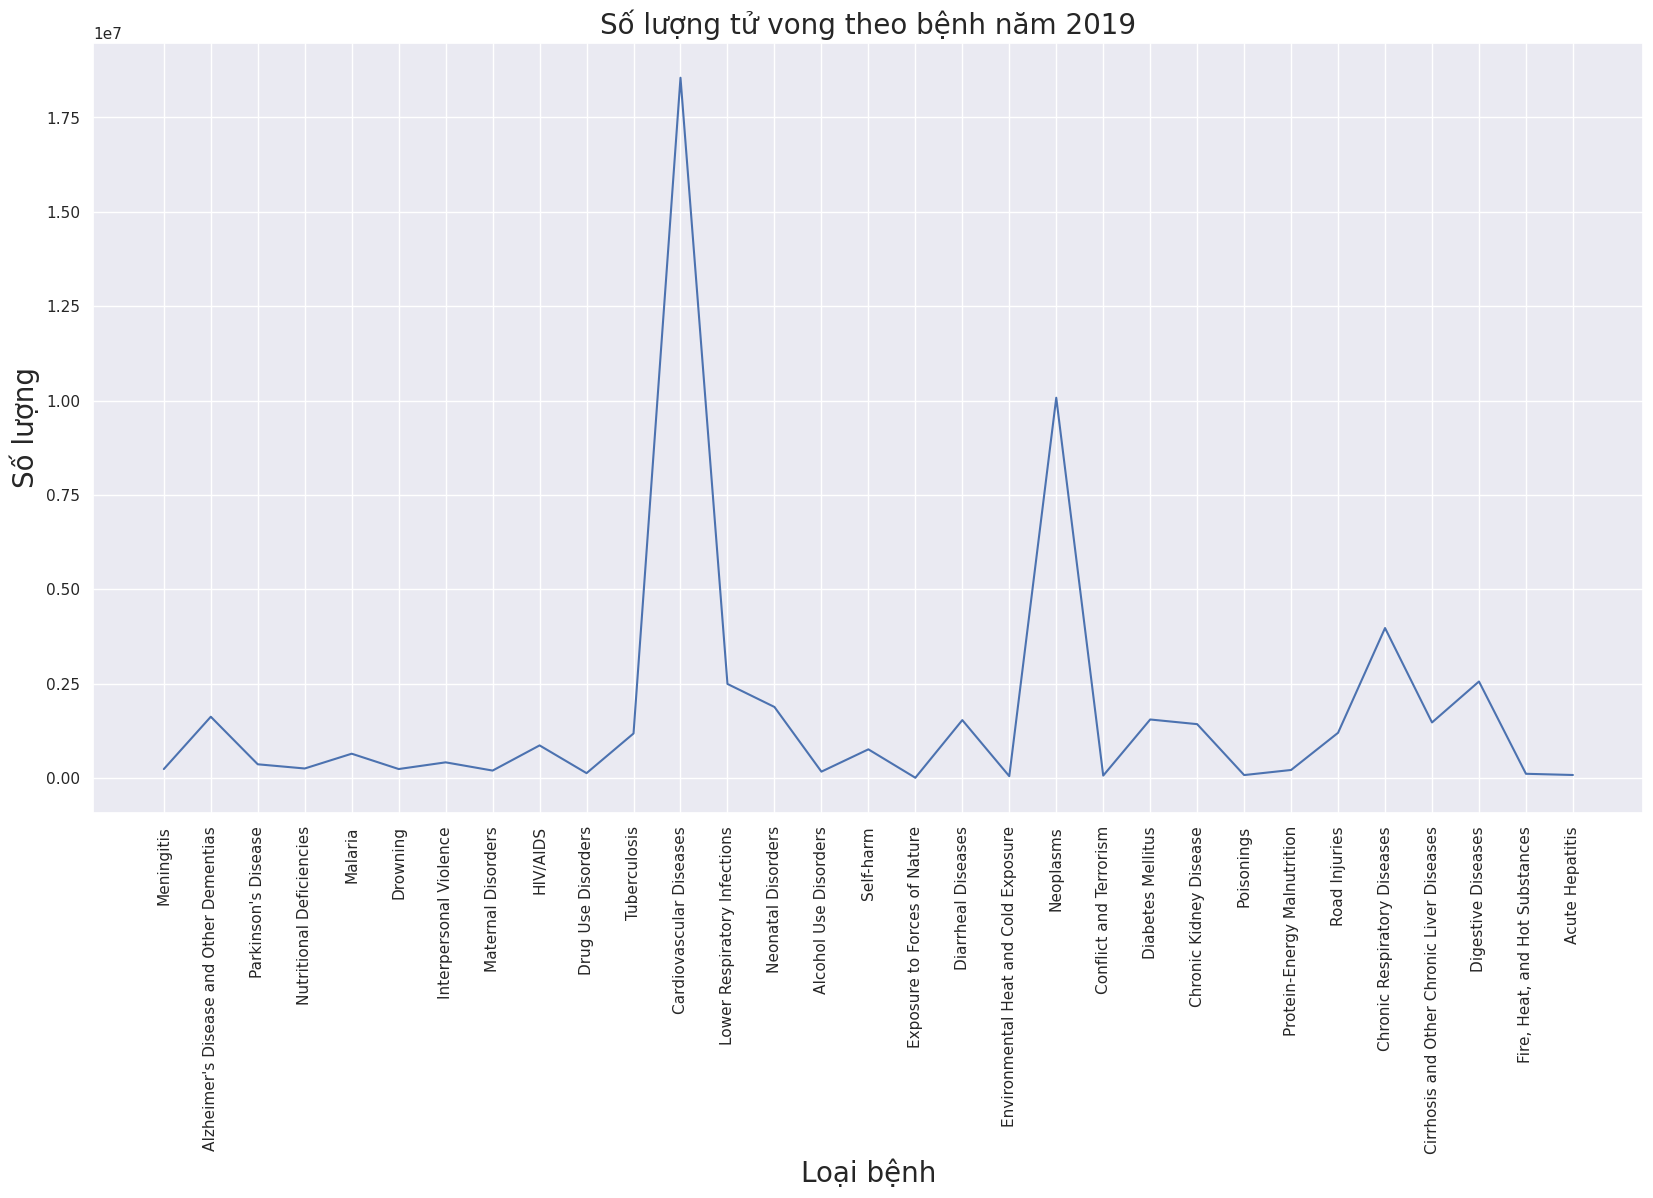

In [87]:
plt.figure(figsize = (20,10))

plt.plot(label, cause_of_deaths_total)

#customize chart
plt.title('Số lượng tử vong theo bệnh năm 2019', fontsize = 20)
plt.xlabel('Loại bệnh', fontsize = 20)
plt.ylabel('Số lượng', fontsize = 20)
plt.xticks(rotation = 90)

plt.show()

Có thể thấy bệnh tim mạch (Cardiovascular Diseases) chiếm số lượng tử vong cao nhất, chính vì vậy chúng ta hãy cùng khảo sát xem xu hướng tử vong do bệnh tim mạch biến đổi như thế nào trong 30 năm qua

**Xu hướng của nguyên nhân gây tử vong cao nhất và thấp nhất**

**Cardiovascular Diseases**

In [88]:
#Lấy tổng số lượng tử vong mỗi năm do bệnh tim mạch
cardiovascular = cause_of_deaths_df.groupby('Year')['Cardiovascular Diseases'].sum()

Vẽ biểu đồ đường thể hiện qua từng năm

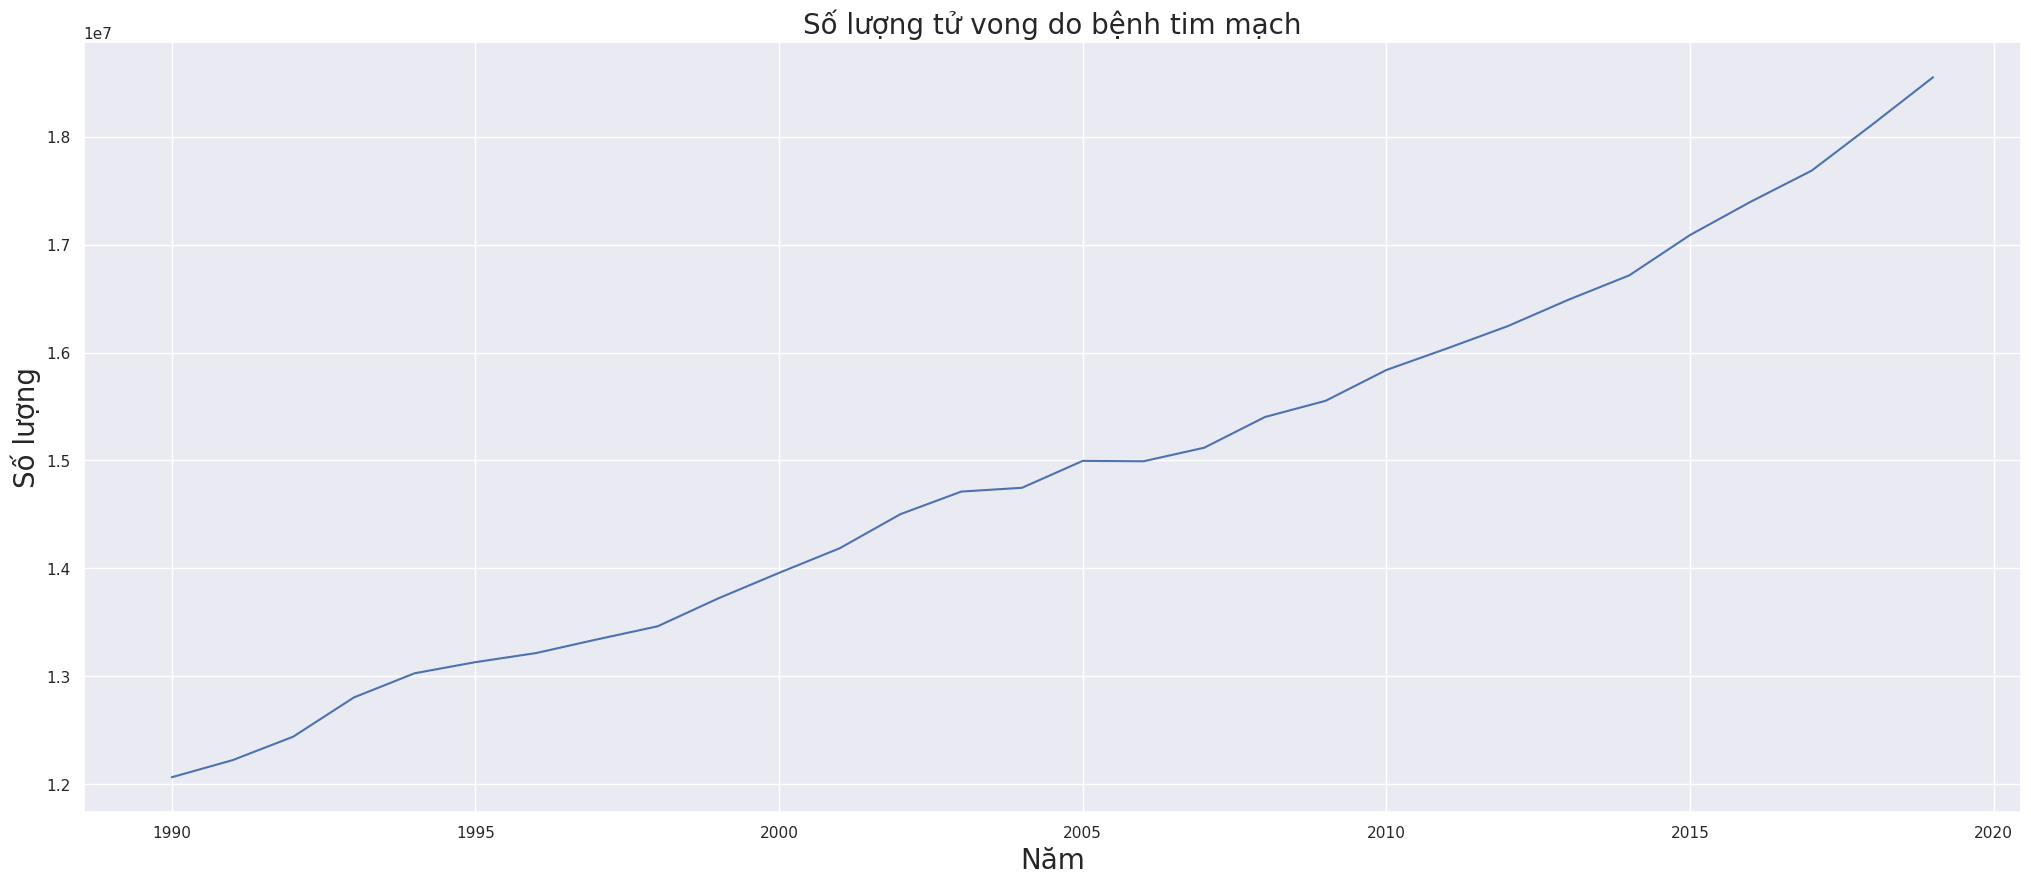

In [89]:
plt.figure(figsize = (25,10))

plt.plot(cardiovascular.index, cardiovascular.values)

#customize chart
plt.title('Số lượng tử vong do bệnh tim mạch', fontsize = 20)
plt.xlabel('Năm', fontsize = 20)
plt.ylabel('Số lượng', fontsize = 20)


plt.show()

Như biểu đồ trên biểu diễn, số lượng tử vong do bệnh tim mạch tăng liên tục trong suốt 30 năm qua\
**Giải thích:** Do dân số mỗi năm không ngừng tăng lên, trong khi đó bệnh tim mạch là một căn bệnh có tính di truyền cao cũng như có thể mắc phải do thói quen sinh hoạt. Chính vì vậy mà số lượng người mắc phải bệnh này không ngừng tăng lên theo từng năm và số lượng tử vong cũng tương tự thế

Khi nhìn vào biểu đồ năm 2019 ta có thể thấy được số lượng người tử vong do thiên tai (Exposure to Forces of Nature) chiếm số lượng rất ít, vì thế cùng khảo sát xem xu hướng của nguyên nhân tử vong này 

**Exposure to Forces of Nature**

In [90]:
#Lấy tổng số lượng tử vong mỗi năm do thiên tai
nature = cause_of_deaths_df.groupby('Year')['Exposure to Forces of Nature'].sum()

Vẽ biểu đồ đường thể hiện qua từng năm

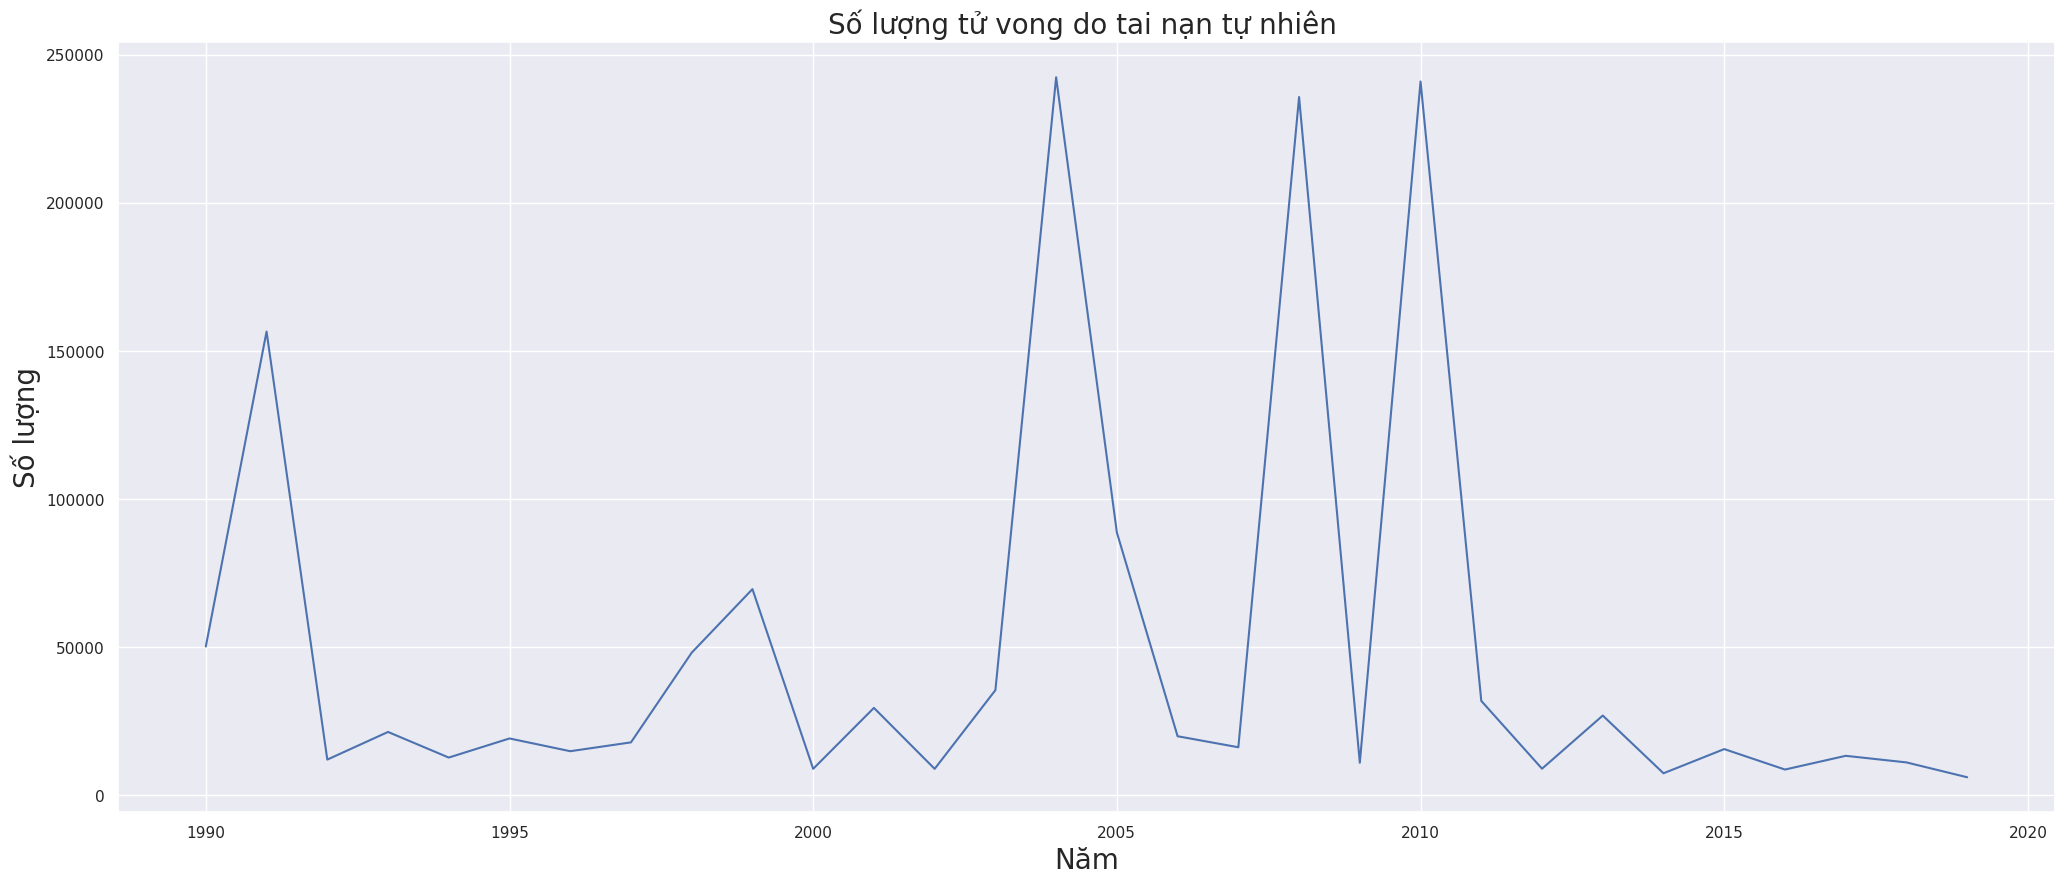

In [91]:
plt.figure(figsize = (25,10))

plt.plot(nature.index, nature.values)

#customize chart
plt.title('Số lượng tử vong do tai nạn tự nhiên ', fontsize = 20)
plt.xlabel('Năm', fontsize = 20)
plt.ylabel('Số lượng', fontsize = 20)


plt.show()

Khác với bệnh tim mạch, nguyên nhân tử vong do thiên tại biến động liên tục trong 30 năm vừa qua, nhưng đặc biệt có xu hướng giảm đáng kể trong 10 năm đổ lại\
**Giải thích:** Do con người đã biết cách phòng chống trước những tai nạn bất ngờ do thiên tai, cách bảo vệ hợp lý trước tự nhiên nên các ca tử vong do nguyên nhân này đã giảm đi trong những năm gần đây. Mặt khác tai nạn xảy ra do tự nhiên tương đối hiếm hơn so với các nguyên nhân khác điển hình như mắc bệnh, chính vì vậy mà chiếm số lượng tử vong ít nhất trong tổng số các nguyên nhân

# Câu 2: Tổng số lượng người tử vong qua từng năm sẽ như thế nào ? Số lượng người tử vong theo từng loại bệnh theo từng năm như thế nào ? Có biểu đồ nào để biểu diễn sự thay đổi này không?

Mục đích: Để xem rằng tình hình thế giới trong những năm 1990 tới 2019 thay đổi như thế nào ? Trả lời cho câu hỏi rằng liệu nền y tế chung của thế giới có được cải thiện hay không ?

Hướng làm: Tạo ra một dataframe với 2 cột là năm và tổng số lượng người tương ứng với lại năm đó

Các bước làm: 


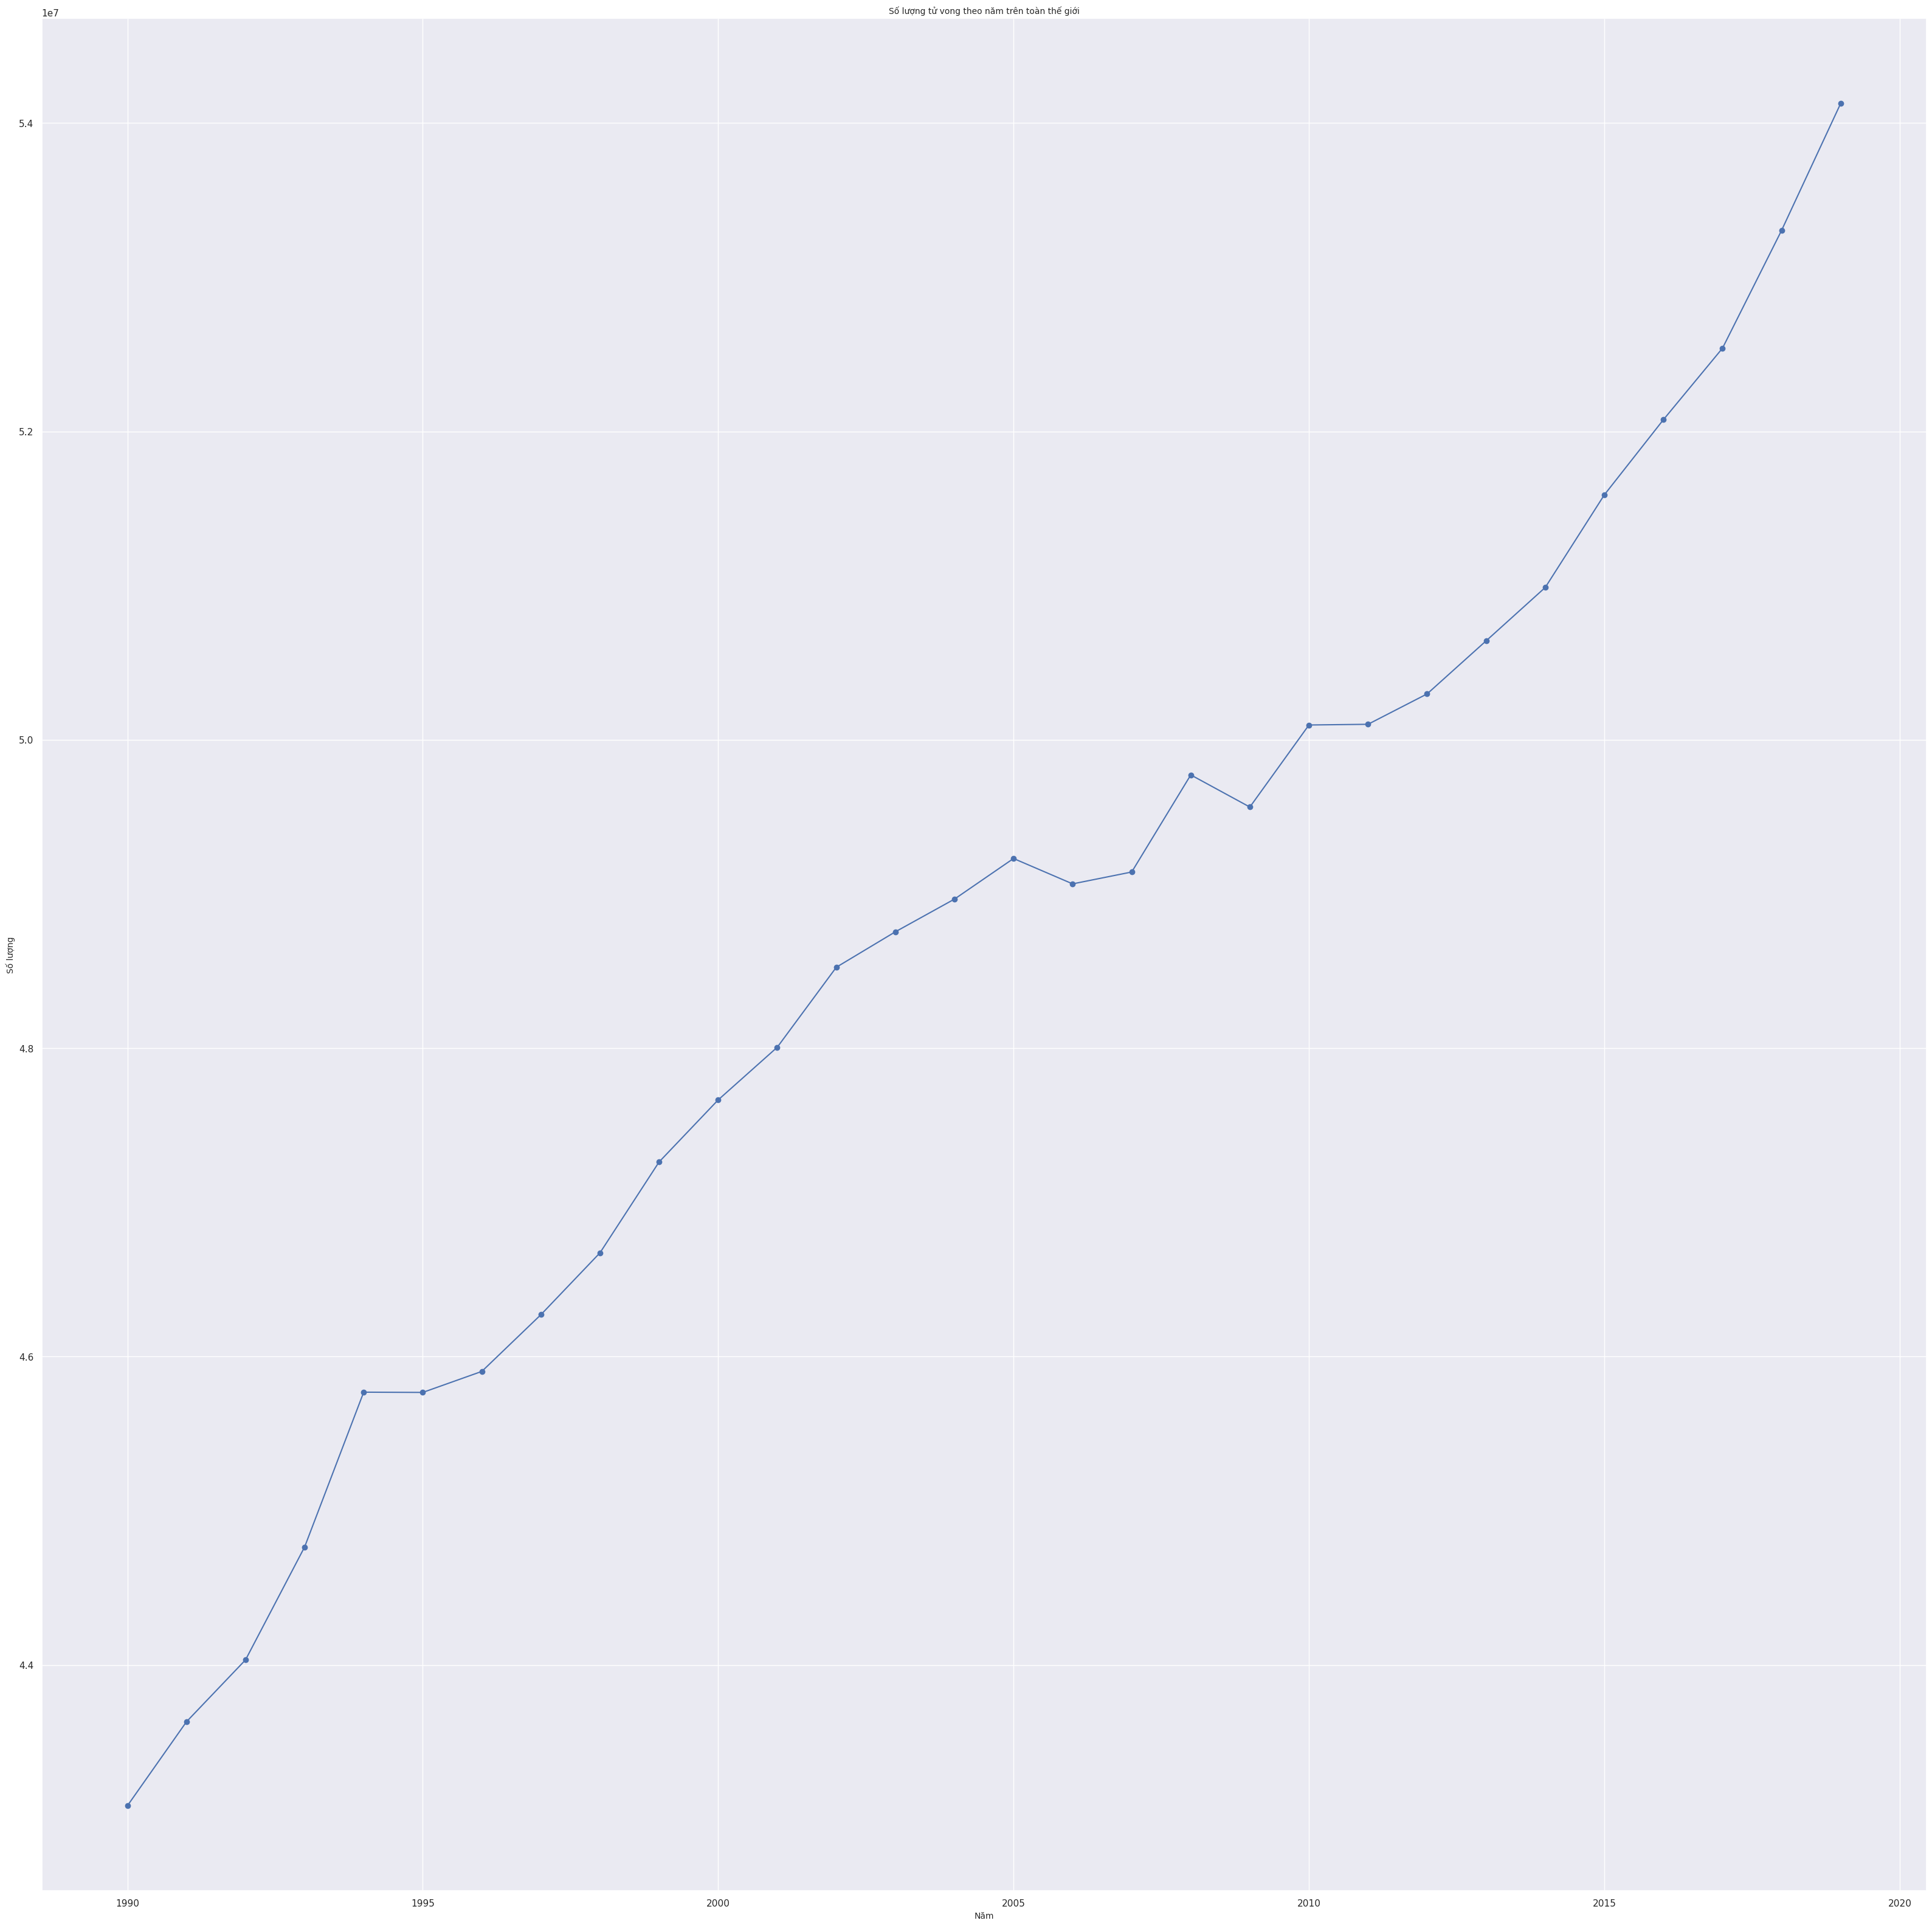

In [92]:
##Giải quyết số Tổng số lượng người tử vong theo từng năm

num_causeOfDeath_by_year = cause_of_deaths_df.groupby("Year")[names_cause].sum()
num_causeOfDeath_by_year


##Sử dụng iloc là để không cộng thêm con số năm ở cột "Year" vào 

total_causeOfDeath_by_year = num_causeOfDeath_by_year.iloc[:, 1:].sum(axis = 1)

##Reset index và dùng phép đổi tên cột

total_causeOfDeath_by_year = total_causeOfDeath_by_year.reset_index()
total_causeOfDeath_by_year = total_causeOfDeath_by_year.rename(columns = {0 : "TotalSum"})
total_causeOfDeath_by_year = total_causeOfDeath_by_year.set_index(['Year'])

##Visuallize lên

plt.plot(total_causeOfDeath_by_year['TotalSum'], marker = 'o')
plt.title('Số lượng tử vong theo năm trên toàn thế giới', fontsize = 10)
plt.xlabel('Năm', fontsize = 10)
plt.ylabel('Số lượng', fontsize = 10)

plt.show()



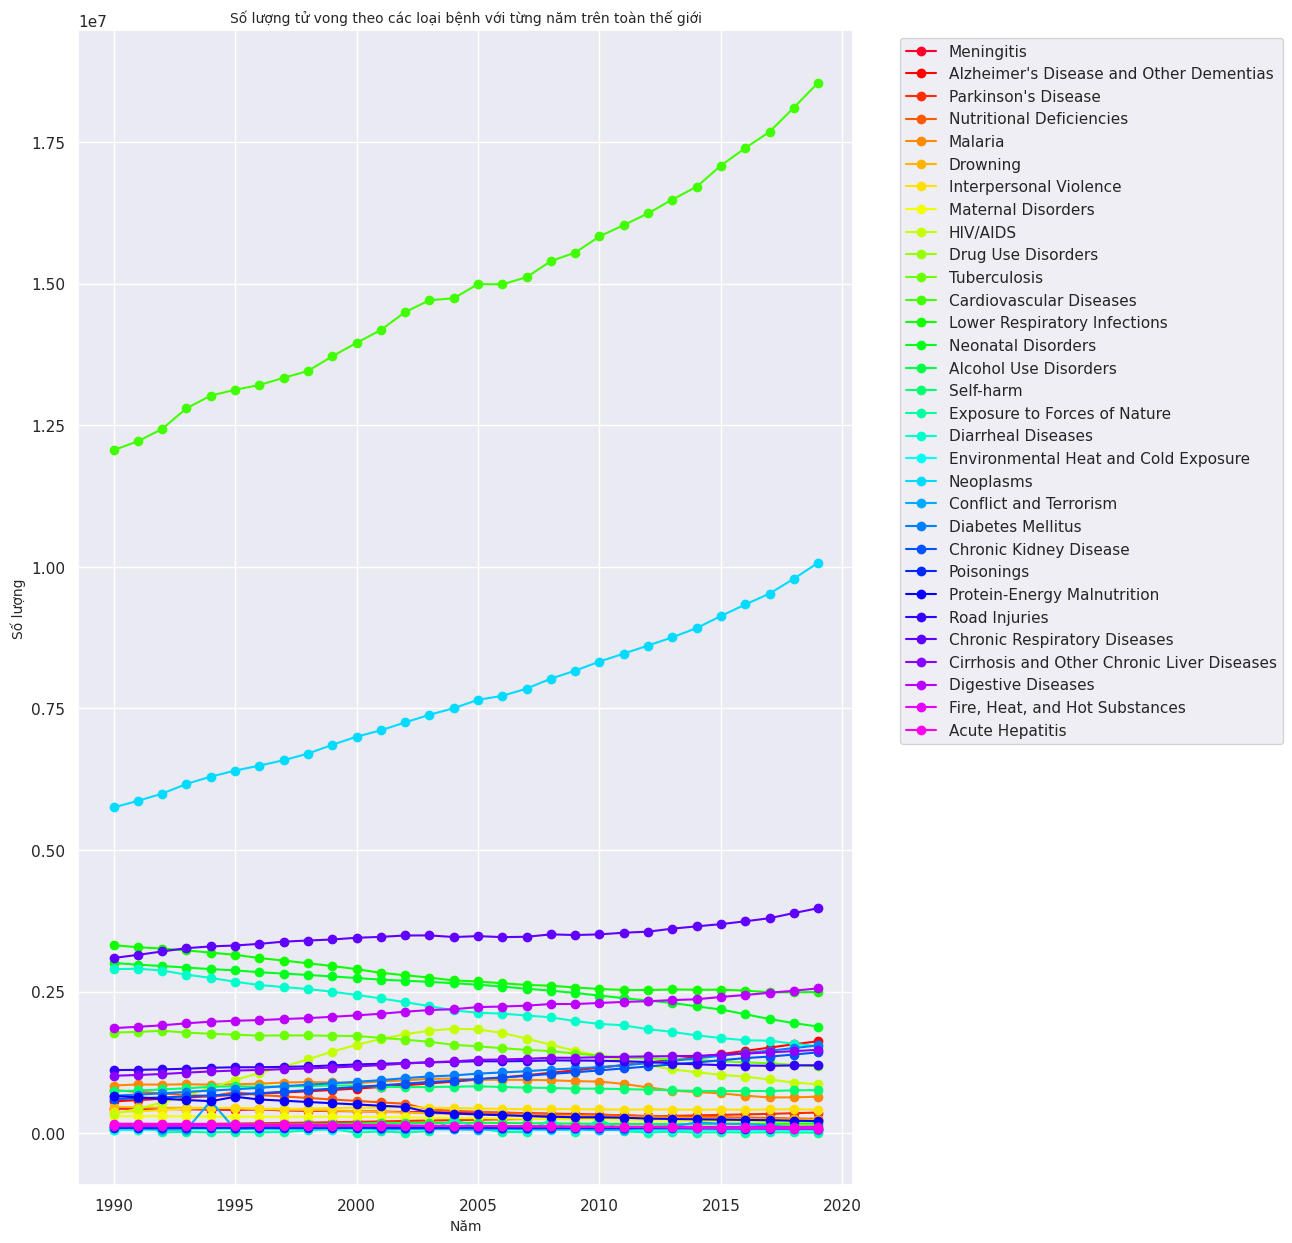

In [93]:
fig = plt.figure(figsize =(10, 15))

NUM_COLORS = len(names_cause)

cm = plt.get_cmap('gist_rainbow')
ax = fig.add_subplot(111)
ax.set_prop_cycle('color', [cm(1.*i/NUM_COLORS) for i in range(NUM_COLORS)])

plt.plot(num_causeOfDeath_by_year, marker = 'o')
plt.title('Số lượng tử vong theo các loại bệnh với từng năm trên toàn thế giới', fontsize = 10)
plt.xlabel('Năm', fontsize = 10)
plt.ylabel('Số lượng', fontsize = 10)
plt.legend(names_cause,bbox_to_anchor=(1.05, 1.0),loc='upper left')
plt.show()

Hmmmm với biểu đồ trên thì việc chúng ta nhận thấy rằng ngoài hai nguyên nhân tử vong về bệnh tim mạch và bệnh khối u ra thì chúng ta khó lòng mà có thể nhìn rõ dữ liệu biến đổi như thế nào. Ta sẽ plot thêm một biểu đồ trong đó loại bỏ hai loại bệnh trên ra

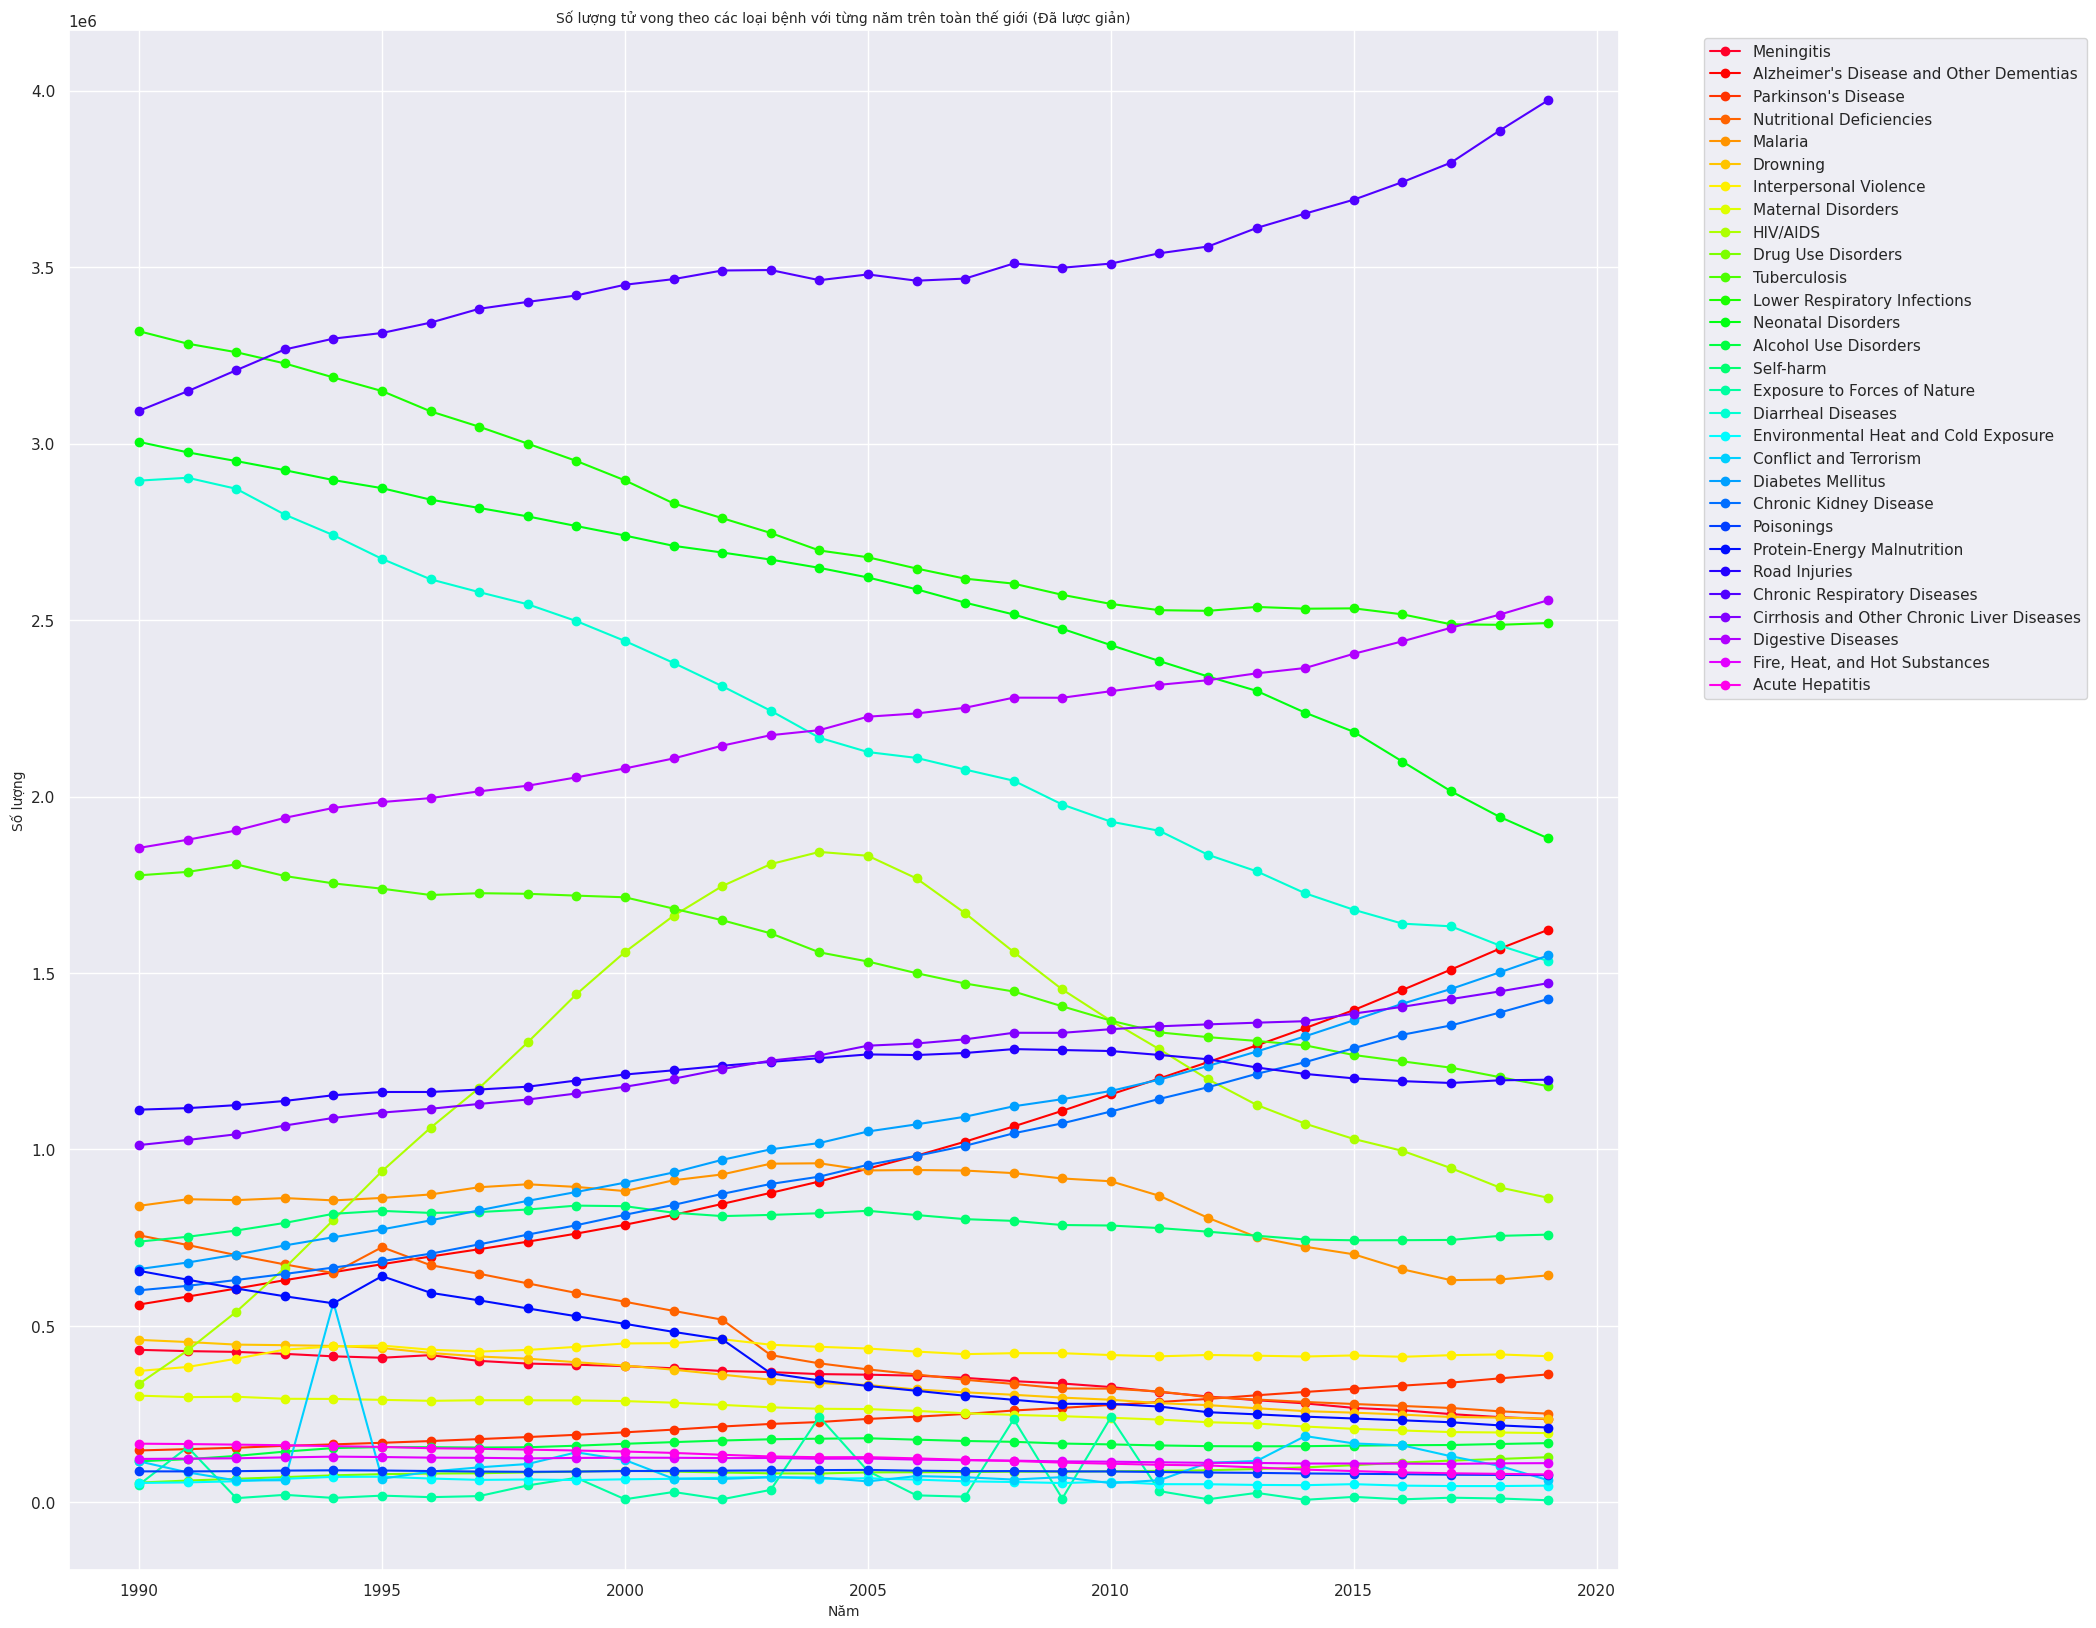

In [94]:
##Drop 2 cột về nguyên nhân tử vong tim mạch và khối u

num_causeOfDeath_by_year_drop = num_causeOfDeath_by_year.drop(['Cardiovascular Diseases','Neoplasms'], axis = 1)
num_causeOfDeath_by_year_drop

fig = plt.figure(figsize =(20, 20))

NUM_COLORS = len(names_cause) -2
cm = plt.get_cmap('gist_rainbow')
ax = fig.add_subplot(111)
ax.set_prop_cycle('color', [cm(1.*i/NUM_COLORS) for i in range(NUM_COLORS)])

plt.plot(num_causeOfDeath_by_year_drop, marker = 'o')
plt.title('Số lượng tử vong theo các loại bệnh với từng năm trên toàn thế giới (Đã lược giản)', fontsize = 10)
plt.xlabel('Năm', fontsize = 10)
plt.ylabel('Số lượng', fontsize = 10)

current_name_causes = list(num_causeOfDeath_by_year_drop.columns.values)


plt.legend(current_name_causes,bbox_to_anchor=(1.05, 1.0),loc='upper left')
plt.show()


Một số nhận xét gì gì đó ...




## Câu 3: Tổng số lượng người tử vong nhiều nhất của từng năm là thuộc về nước nào ? Liệt kê ra top 5 từng năm ? Có thể đưa ra được biểu đồ phân bố ?*

In [95]:
def getMaxYear():
    
    ##Hàm này sẽ trả về một dataFrame với 3 cột Country-Territory/Year/Total với total là số lượng người tử vong trong year đó
    countries_maxDeath_byYear = pd.DataFrame()
    ##Ở đây ta sử dụng vòng lặp để lặp qua từng năm, chi phí sẽ không đáng kể vì số năm khảo sát là 31 năm, một con số constant không lớn
    for year in years:
        current_df = cause_of_deaths_df[cause_of_deaths_df['Year'] == year]
        current_df = current_df.reset_index().drop(["Code","index"], axis = 1)
        ##iloc[:, 2:] là để skip qua cột Year trong data frame
        current_df['Total'] = current_df.iloc[:, 2:].sum(axis = 1)
        country_total_df = current_df[['Country/Territory','Year','Total']]
        country_max = country_total_df [ country_total_df['Total'] == country_total_df['Total'].max()]
        if countries_maxDeath_byYear.empty:
            countries_maxDeath_byYear = country_max
        else:
            countries_maxDeath_byYear = countries_maxDeath_byYear.append(country_max)
    
    ##Xử lý dataframe
    countries_maxDeath_byYear = countries_maxDeath_byYear.reset_index()
    countries_maxDeath_byYear = countries_maxDeath_byYear.drop(['index'], axis = 1)
    return countries_maxDeath_byYear
    
countries_maxDeath_byYear = getMaxYear()

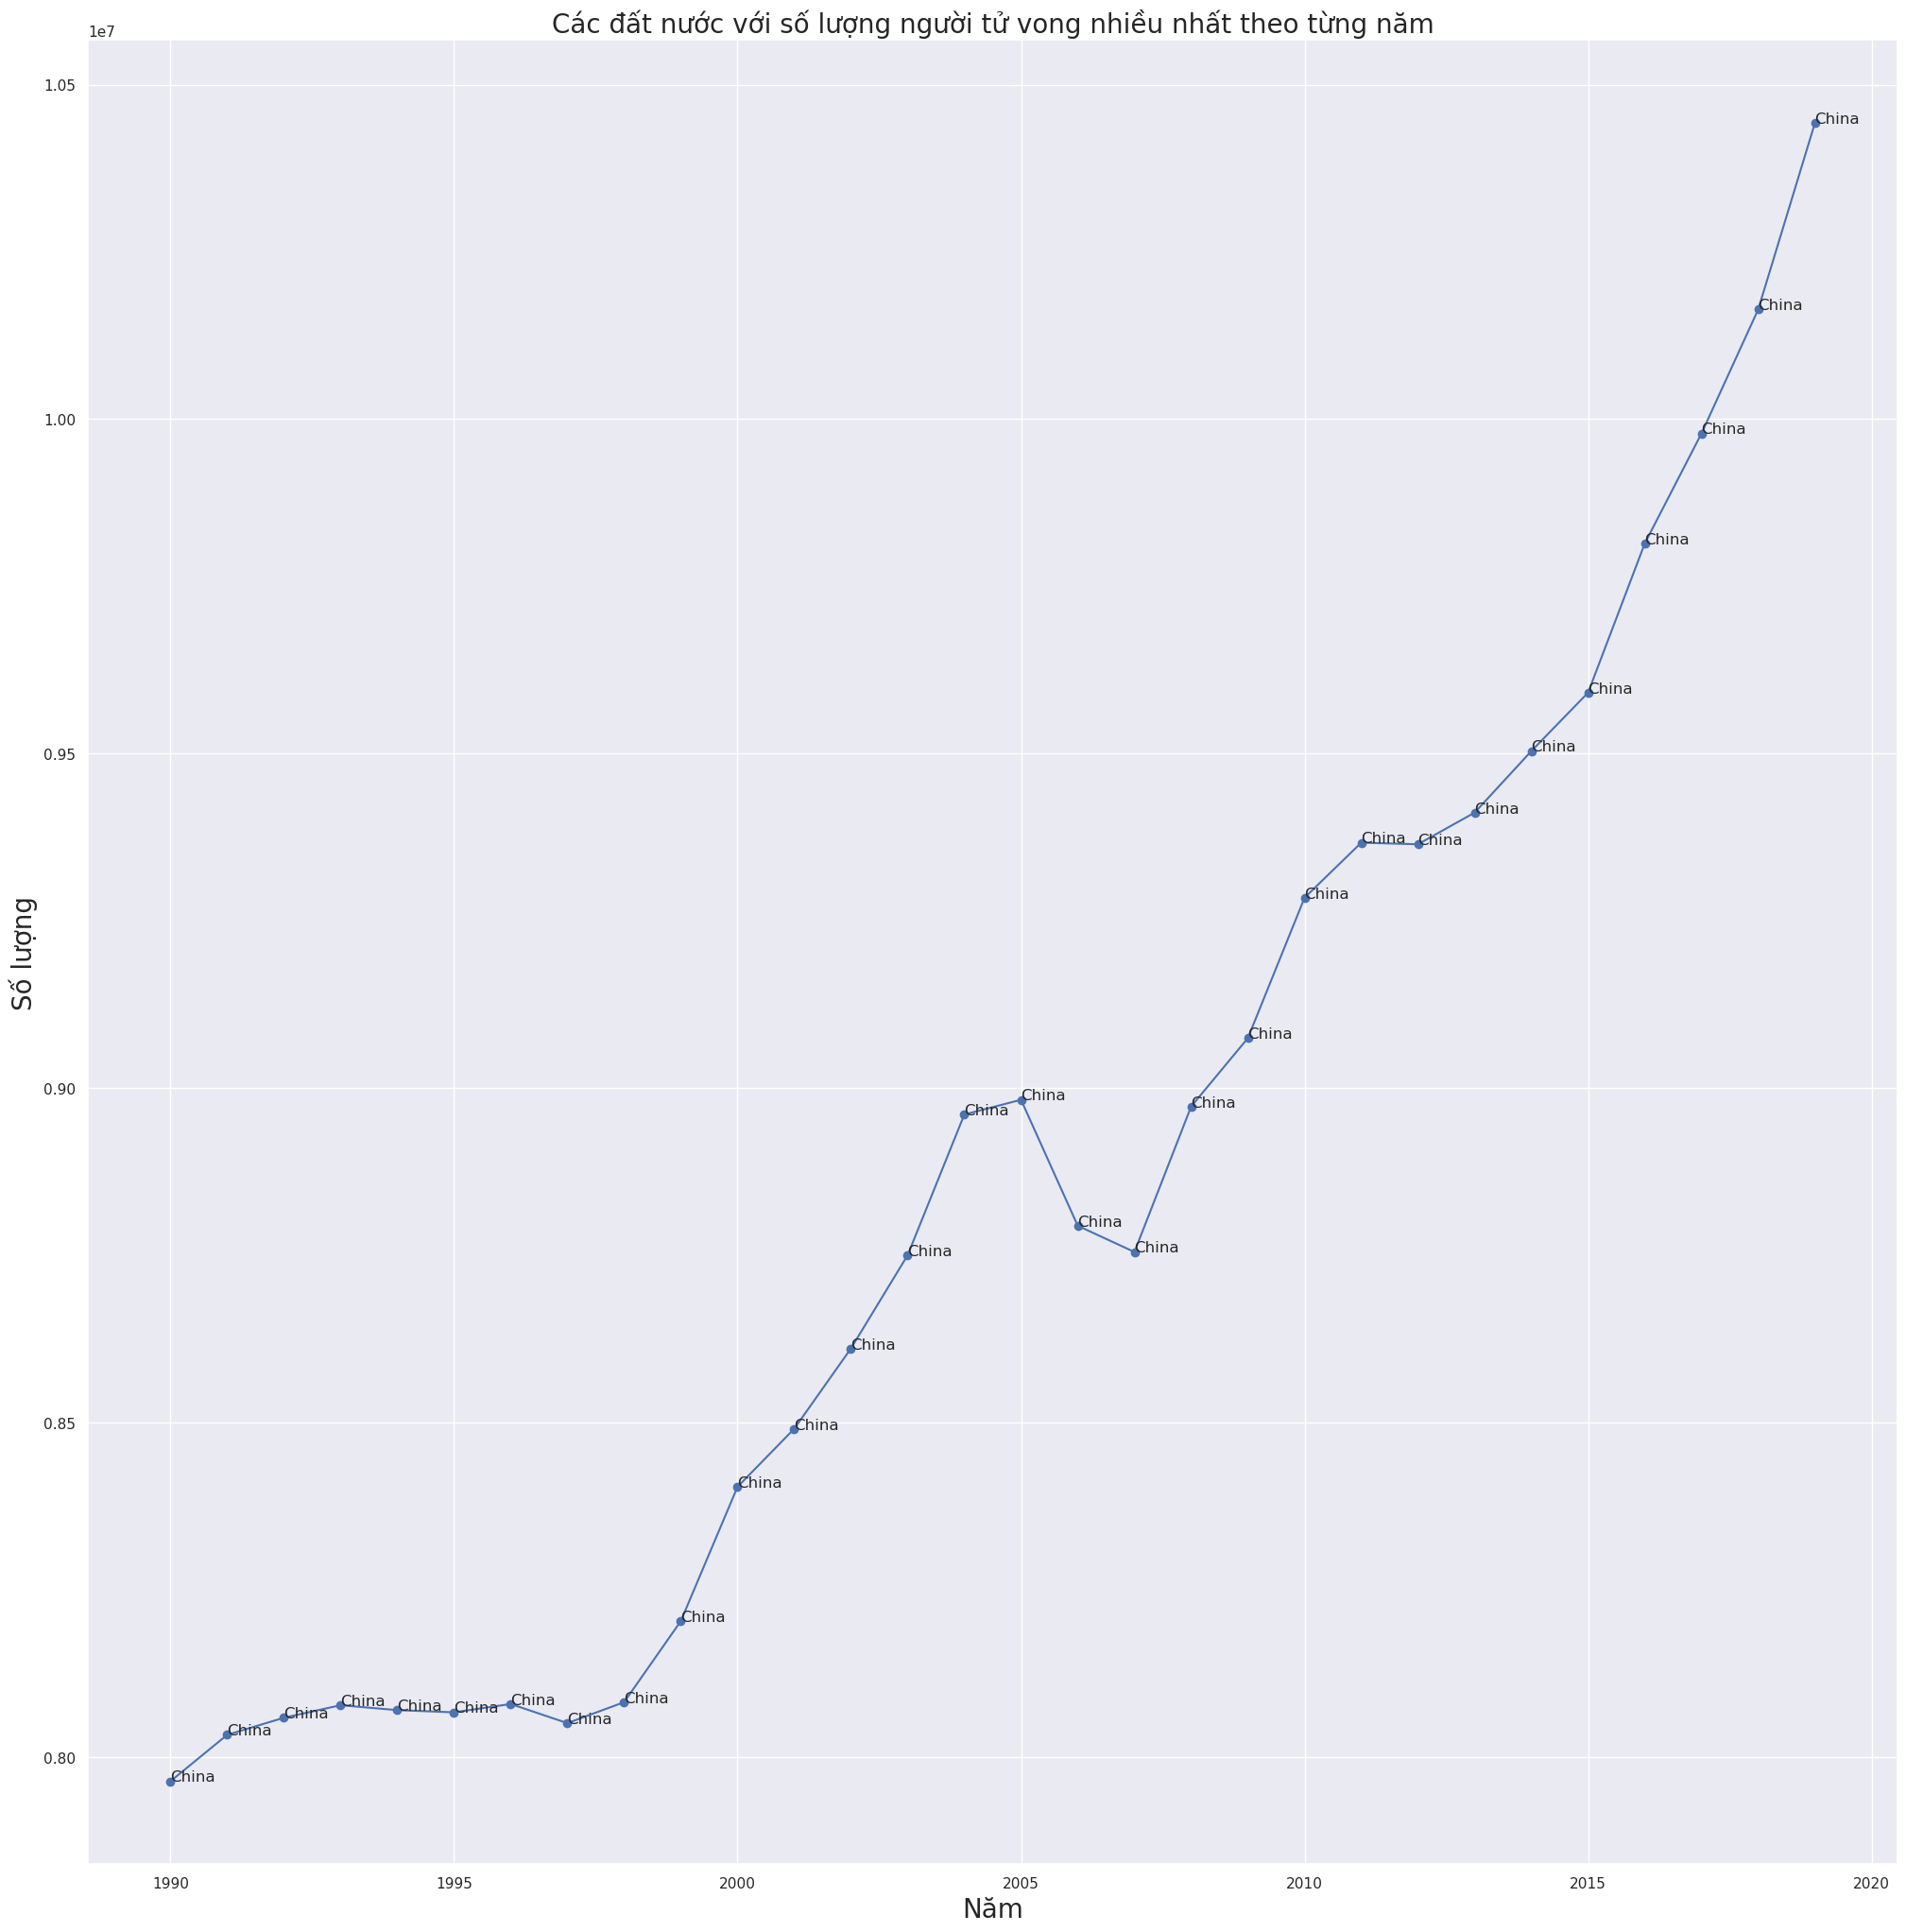

In [96]:
##Visualize dữ liệu

fig, ax = plt.subplots(figsize = (20,20))
fig.tight_layout()
plt.title('Các đất nước với số lượng người tử vong nhiều nhất theo từng năm', fontsize = 20)
plt.xlabel('Năm', fontsize = 20)
plt.ylabel('Số lượng', fontsize = 20)
ax.plot(countries_maxDeath_byYear['Year'],countries_maxDeath_byYear['Total'], marker = 'o')
for i, txt in enumerate(countries_maxDeath_byYear['Country/Territory']):
    ax.annotate(txt, (countries_maxDeath_byYear['Year'][i], countries_maxDeath_byYear['Total'][i]))



**Nhận xét:**

Kết quả đầu ra khá là bất ngờ vì với mỗi năm, đất nước có số lượng người tử vong nhiều nhất chính là **Trung Quốc**. Một số yếu tố có thể ảnh hưởng tới con số này đó chính là dân số của nước đó trong năm đó, chất lượng giáo dục ( yếu tố này ảnh hưởng bởi vì chất lượng giáo dục ảnh hưởng tới việc con người của nước đó có được giáo dục kỹ về sức khỏe hay không? Có biết rằng nên đi khám tổng quát để phát hiện bệnh sớm tránh dẫn tới việc để bệnh quá lâu ) và chất lượng nền y tế của đất nước đó nữa.

Vậy ta nên đặt câu hỏi là: Tại sao Trung Quốc lại luôn là đất nước dẫn đầu về số lượng người tử vong cao nhất trên thế giới ? Và tại sao con số này đang có xu hướng tăng lên ?

Tuy nhiên rằng chúng ta sẽ cùng tới với yếu tố về dân số trước, trước đó rằng ta sẽ cùng khảo sát thêm một thông số là (những) đất nước có số lượng người tử vong ít nhất theo mỗi năm để xem thử rằng những đất nước có lượng người tử vong ít mỗi năm sẽ có dân số như thế nào?

In [97]:
def getMinYear():
    countries_minDeath_byYear = pd.DataFrame()
    for year in years:
        current_df = cause_of_deaths_df[cause_of_deaths_df['Year'] == year]
        current_df = current_df.reset_index().drop(["Code","index"], axis = 1)
        current_df['Total'] = current_df.iloc[:, 2:].sum(axis = 1)
        country_total_df = current_df[['Country/Territory','Year','Total']]
        country_min = country_total_df [ country_total_df['Total'] == country_total_df['Total'].min()]
        if countries_minDeath_byYear.empty:
            countries_minDeath_byYear = country_min
        else:
            ##Việc dùng append sẽ lấy tất cả các dữ liệu nếu bằng nhau
            countries_minDeath_byYear = countries_minDeath_byYear.append(country_min)
    
    countries_minDeath_byYear = countries_minDeath_byYear.reset_index()
    countries_minDeath_byYear = countries_minDeath_byYear.drop(['index'], axis = 1)
    return countries_minDeath_byYear

countries_minDeath_byYear = getMinYear()

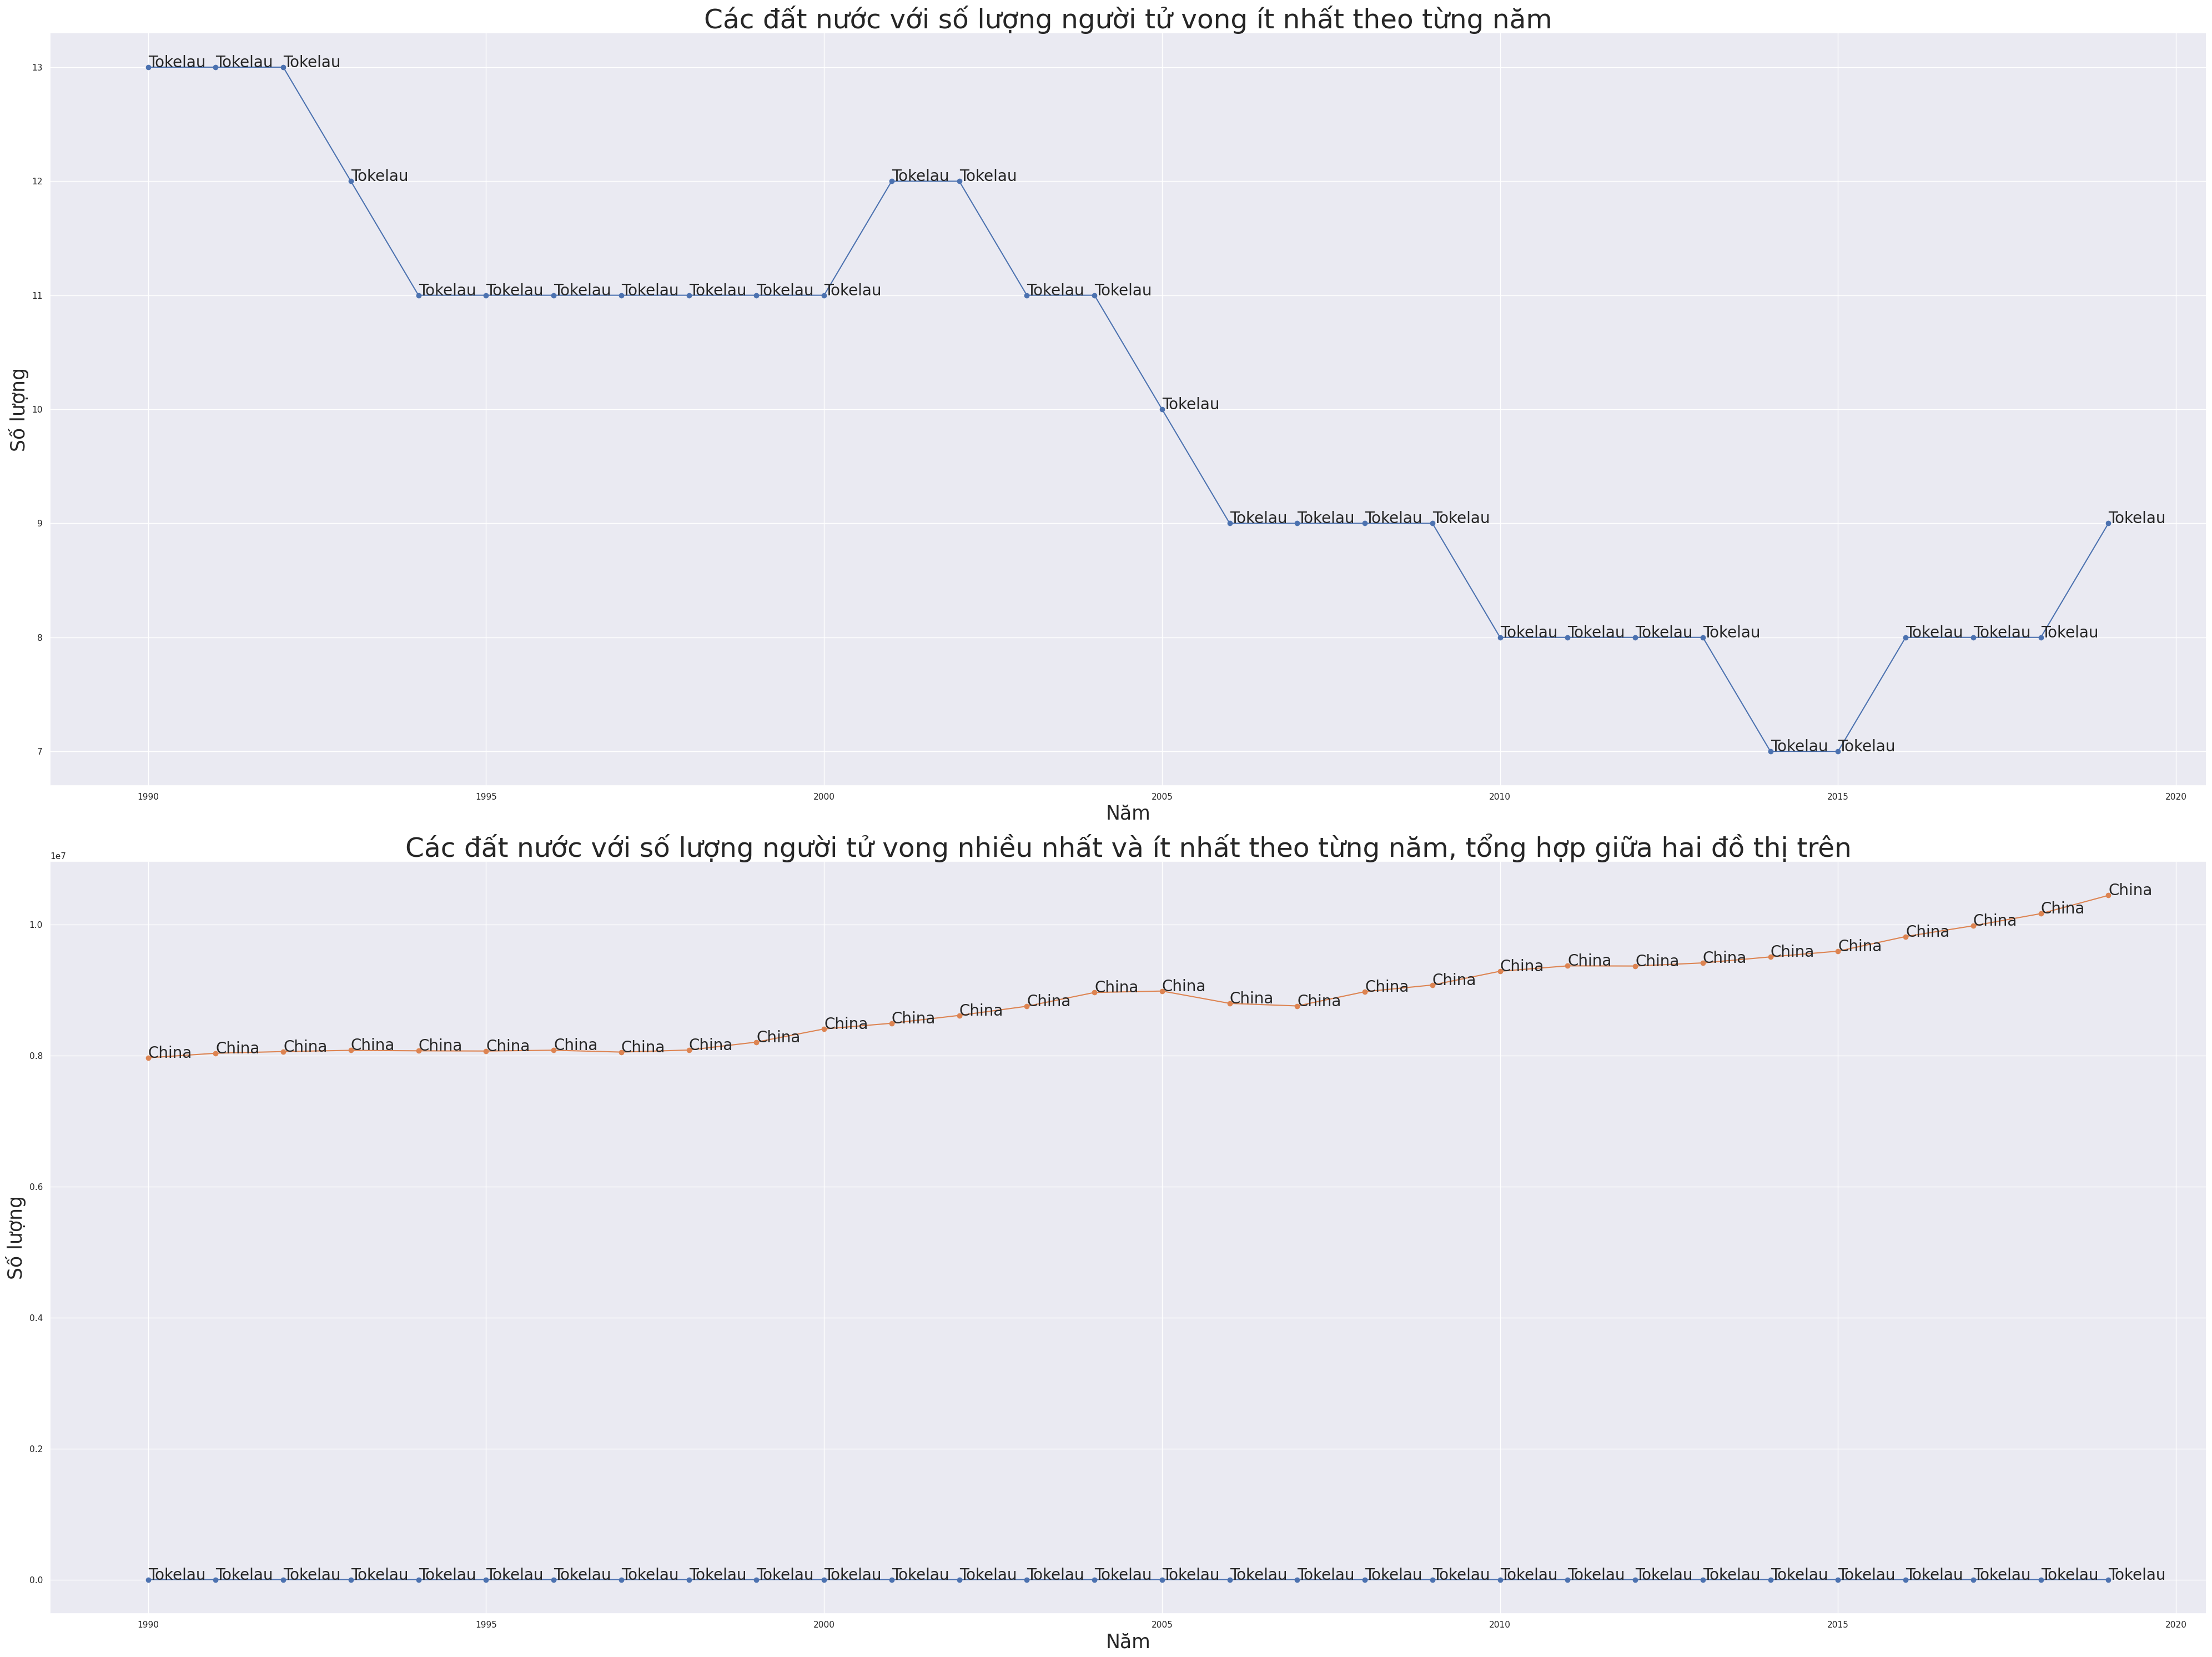

In [98]:
##Visualize dữ liệu

fig, ax = plt.subplots(2, figsize = (40,30))

##ax0: Các đất nước với số lượng người tử vong ít nhất theo từng năm
ax[0].set_title('Các đất nước với số lượng người tử vong ít nhất theo từng năm', fontsize = 35)
ax[0].set_xlabel('Năm', fontsize = 25)
ax[0].set_ylabel('Số lượng', fontsize = 25)
ax[0].plot(countries_minDeath_byYear['Year'],countries_minDeath_byYear['Total'], marker = 'o')
for i, txt in enumerate(countries_minDeath_byYear['Country/Territory']):
    ax[0].annotate(txt, (countries_minDeath_byYear['Year'][i], countries_minDeath_byYear['Total'][i]), fontsize = 20)
    

##ax1: Các đất nước với số lượng người tử vong ít nhất theo từng năm
ax[1].set_title('Các đất nước với số lượng người tử vong nhiều nhất và ít nhất theo từng năm, tổng hợp giữa hai đồ thị trên', fontsize = 35)
ax[1].set_xlabel('Năm', fontsize = 25)
ax[1].set_ylabel('Số lượng', fontsize = 25)
ax[1].plot(countries_minDeath_byYear['Year'],countries_minDeath_byYear['Total'], marker = 'o')
ax[1].plot(countries_maxDeath_byYear['Year'],countries_maxDeath_byYear['Total'], marker = 'o')

for i, txt in enumerate(countries_maxDeath_byYear['Country/Territory']):
    ax[1].annotate(txt, (countries_maxDeath_byYear['Year'][i], countries_maxDeath_byYear['Total'][i]), fontsize = 20)
for i, txt in enumerate(countries_minDeath_byYear['Country/Territory']):
    ax[1].annotate(txt, (countries_minDeath_byYear['Year'][i], countries_minDeath_byYear['Total'][i]),fontsize = 20)
    
fig.tight_layout()


Ở đây, chúng ta có thể thấy rằng, tương tự với lại số lượng ca tử vong nhiều nhất theo năm từ 1990-2019 thì chỉ đều thuộc về Trung Quốc, thì số lượng ca tử vong ít nhất theo năm lại thuộc về đúng một nước là Tokelau, với đỉnh điểm số ca tử vong là dưới 3000 ca một năm ở năm 2019. Vậy thì chúng ta sẽ cùng tìm hiểu dân số giữa hai nước này sẽ như thế nào:
    
    Dân số thế giới theo Google của 2 nước vào năm 2019:
        Tokelau: 1.340
        Trung Quốc: 1,408 tỷ
        
Vậy rằng, ta cũng có thể đưa ra được một kết luận rằng dân số càng ít thì số lượng tử vong cũng càng ít là hoàn toàn có cơ sở.

Nhắc lại câu hỏi trước khi ta phân tích về vấn đề này: ****Tại sao Trung Quốc lại luôn là đất nước dẫn đầu về số lượng người tử vong cao nhất trên thế giới ? Và tại sao con số này đang có xu hướng tăng lên ?****

Có thể trả lời bằng thông tin: dân số thế giới đang tăng lên từng ngày và Trung Quốc hiện đang là đất nước có dân số đông nhất thế giới => dẫn đầu về số lượng người tử vong cao nhất trên thế giới và có xu hướng tăng lên

Tuy nhiên, ta có thể thấy, thông số đã giảm xuống vào khoảng thời gian 2005 -2008 thì số lượng người tử vong của quốc gia này lại có dấu hiệu giảm, tuy nhiên là đã tăng trưởng trở lại ngay sau vài năm sau đó.

### Chúng ta sẽ cùng tìm hiểu sâu hơn về 5 nước có tỷ lệ tử vong nhiều nhất theo từng năm

In [99]:
def getTop5MaxCountry_byYear():
    top_5_countries_maxDeath_byYear = pd.DataFrame()
    for year in years:
        
        current_df = cause_of_deaths_df[cause_of_deaths_df['Year'] == year]
        current_df = current_df.reset_index().drop(["Code","index"], axis = 1)
        current_df['Total'] = current_df.iloc[:, 2:].sum(axis = 1)
        country_total_df = current_df[['Country/Territory','Year','Total']]
        
        country_sort_max = country_total_df.sort_values(by = "Total", ascending=False)
        top_5_country_max_year = country_sort_max.iloc[:5,:]
        
        top_5_country_max_year = top_5_country_max_year.reset_index(drop = True)
        
        if(top_5_countries_maxDeath_byYear.empty):
            top_5_countries_maxDeath_byYear = top_5_country_max_year
        else:
            top_5_countries_maxDeath_byYear = top_5_countries_maxDeath_byYear.append(top_5_country_max_year)
    
    return top_5_countries_maxDeath_byYear.reset_index(drop=True)

top_5_countries_maxDeath_byYear = getTop5MaxCountry_byYear()

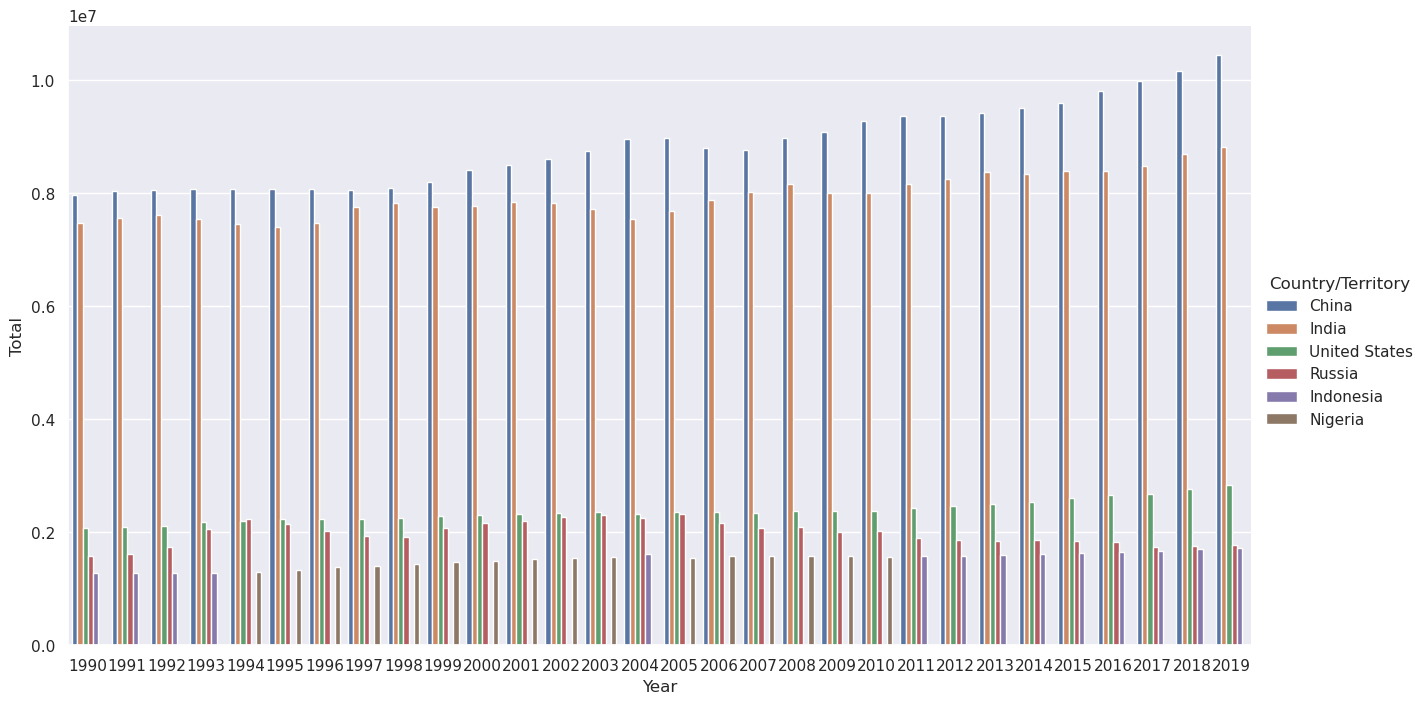

In [100]:
##Data visualization
##Ở đây ta sẽ dùng sự trợ giúp của anh bạn seaborn
import seaborn as sb

sb.set(rc={'figure.figsize':(40,40)})
sb.catplot(x='Year', y='Total', hue='Country/Territory', data=top_5_countries_maxDeath_byYear, kind='bar',height=7, aspect=1.8)



Một số nhận xét ....

### Tương tự, chúng ta sẽ cùng tìm hiểu sâu hơn về 5 nước có tỷ lệ tử vong ít nhất nhất theo từng năm

In [101]:
def getTop5MinCountry_byYear():
    top_5_countries_minDeath_byYear = pd.DataFrame()
    for year in years:
        
        current_df = cause_of_deaths_df[cause_of_deaths_df['Year'] == year]
        current_df = current_df.reset_index().drop(["Code","index"], axis = 1)
        current_df['Total'] = current_df.iloc[:, 2:].sum(axis = 1)
        country_total_df = current_df[['Country/Territory','Year','Total']]
        
        country_sort_min = country_total_df.sort_values(by = "Total", ascending=True)
        top_5_country_min_year = country_sort_min.iloc[:5,:]
        
        top_5_country_min_year = top_5_country_min_year.reset_index(drop = True)
        
        if(top_5_countries_minDeath_byYear.empty):
            top_5_countries_minDeath_byYear = top_5_country_min_year
        else:
            top_5_countries_minDeath_byYear = top_5_countries_minDeath_byYear.append(top_5_country_min_year)
    
    return top_5_countries_minDeath_byYear.reset_index(drop=True)

top_5_countries_minDeath_byYear = getTop5MinCountry_byYear()

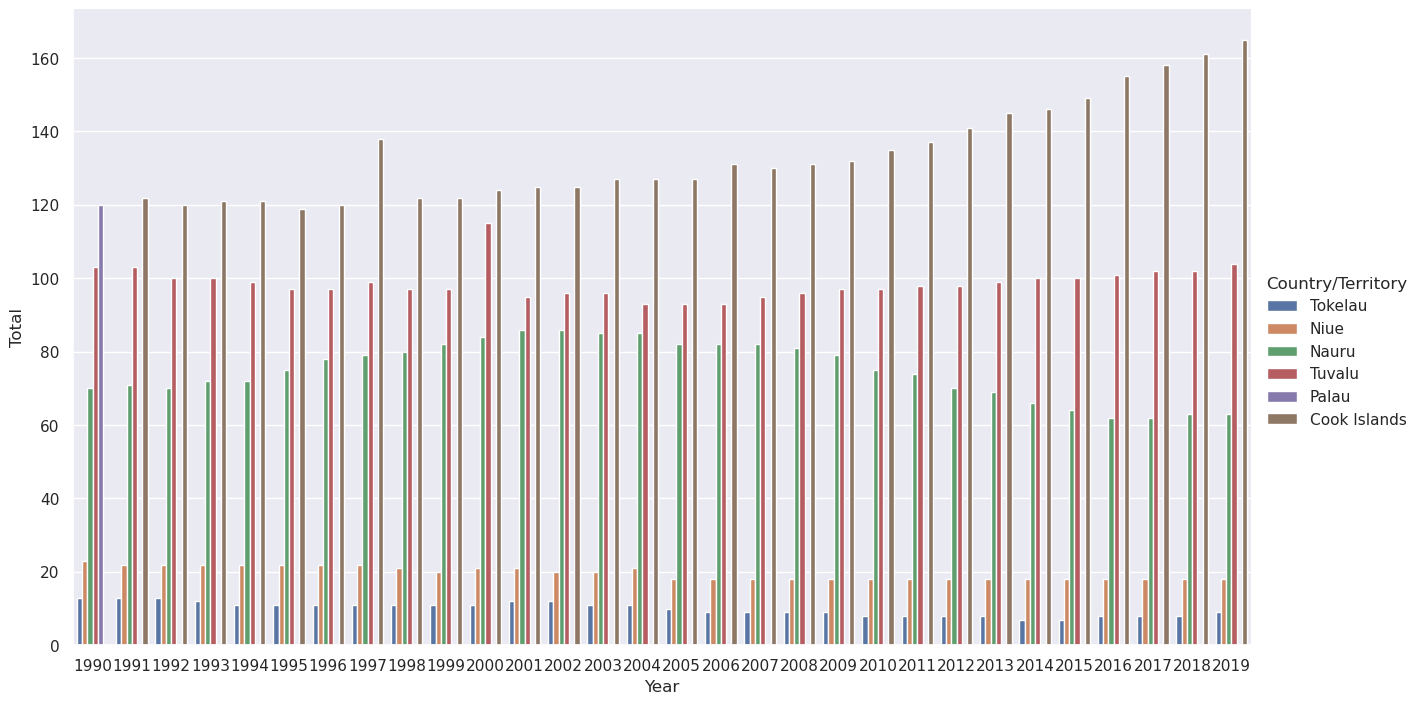

In [102]:
##Data visualization
##Ở đây ta (lại) dùng sự trợ giúp của anh bạn seaborn

sb.set(rc={'figure.figsize':(40,40)})
sb.catplot(x='Year', y='Total', hue='Country/Territory', data=top_5_countries_minDeath_byYear, kind='bar',height=7, aspect=1.8)



Một số nhận xét ...

# Câu 4:Với từng năm, bệnh nào có tổng số người tử vong nhiều nhất ? Liệt kê ra top 5 mỗi năm

In [103]:
sum_deaths_by_year = cause_of_deaths_df.groupby('Year').sum().reset_index()
dff = sum_deaths_by_year.apply(lambda x: pd.Series(x.nlargest(5).index), axis=1).reset_index(drop=True)
dff.loc[:,'Year'] = sum_deaths_by_year['Year']
dff.rename({0:'1st',1:'2nd',2:'3rd',3:'4th',4:'5th'},axis=1)

,1st,2nd,3rd,4th,5th,Year
0,Cardiovascular Diseases,Neoplasms,Lower Respiratory Infections,Chronic Respiratory Diseases,Neonatal Disorders,1990
1,Cardiovascular Diseases,Neoplasms,Lower Respiratory Infections,Chronic Respiratory Diseases,Neonatal Disorders,1991
2,Cardiovascular Diseases,Neoplasms,Lower Respiratory Infections,Chronic Respiratory Diseases,Neonatal Disorders,1992
3,Cardiovascular Diseases,Neoplasms,Chronic Respiratory Diseases,Lower Respiratory Infections,Neonatal Disorders,1993
4,Cardiovascular Diseases,Neoplasms,Chronic Respiratory Diseases,Lower Respiratory Infections,Neonatal Disorders,1994
5,Cardiovascular Diseases,Neoplasms,Chronic Respiratory Diseases,Lower Respiratory Infections,Neonatal Disorders,1995
6,Cardiovascular Diseases,Neoplasms,Chronic Respiratory Diseases,Lower Respiratory Infections,Neonatal Disorders,1996
7,Cardiovascular Diseases,Neoplasms,Chronic Respiratory Diseases,Lower Respiratory Infections,Neonatal Disorders,1997
8,Cardiovascular Diseases,Neoplasms,Chronic Respiratory Diseases,Lower Respiratory Infections,Neonatal Disorders,1998
9,Cardiovascular Diseases,Neoplasms,Chronic Respiratory Diseases,Lower Respiratory Infections,Neonatal Disorders,1999


Nhận xét:

- Kể từ năm 1990, top 1 và top 2 không thay đổi là bệnh tim mạch và khối u. Bệnh tim mạch luôn là nguyên nhân gây tử vong hàng đầu trên thế giới, nhiều hơn cả bệnh ung thư.
- Bệnh viêm đường hô hấp (Lower Respiratory Infections) đang có xu hướng giảm dần trong những năm gần đây nhưng ta không được chủ quan vì chúng vẫn nằm trong top 5 bệnh gây tử vong trên thế giới.
- Bệnh rối loạn sơ sinh (Neonatal Disorders) kể từ năm 2013 đã không còn nằm trong top 5. Một điều đáng mừng
- Bệnh về đường tiêu hóa (Digestive Diseases) đang có xu hướng chen chân vào top 5 trong những năm gần đây. Ta cần chú ý về loại bệnh này.

# Câu 5: Hãy phân tích về tỉ lệ tử vong của Việt Nam bằng cách trả lời những câu hỏi sau đây:

## 5.1 Tổng số người tử vong ở Việt Nam trong khảo sát này từ năm 1990-2019? Từ đó ta có nhận xét gì?

Đầu tiên lấy tất cả các dòng dữ liệu thuộc nước Việt Nam. 

Sau đó ta tạo thêm cột **Sum Death** ứng với tổng số người tử vong theo từng năm của từng quốc gia.

In [104]:
# Lấy những người tử vong tại Việt Nam
vietnamese_death = cause_of_deaths_df[cause_of_deaths_df['Country/Territory']=='Vietnam'].reset_index(drop=True)

# Tạo thêm cột tổng số người tử vong theo từng năm
vietnamese_death.loc[:,'Sum Death'] = vietnamese_death[names_cause.values].sum(axis=1)
vietnamese_death = vietnamese_death.sort_values('Year')

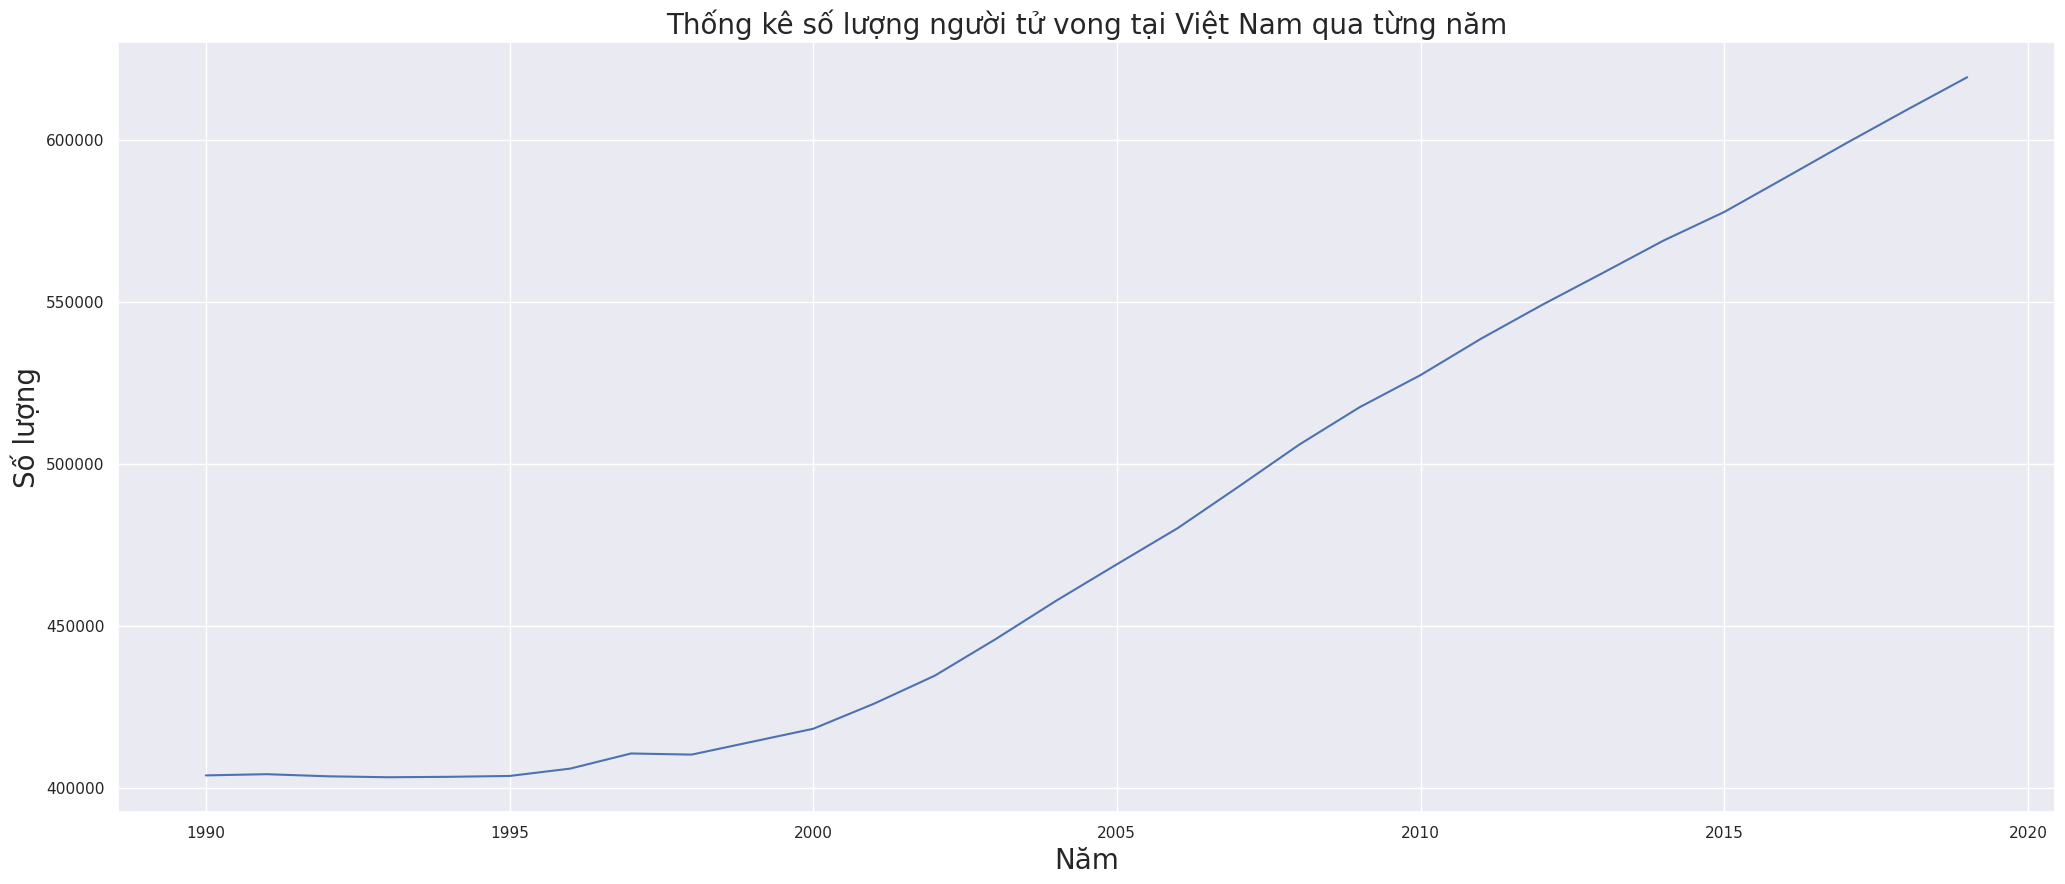

In [105]:
plt.figure(figsize = (25,10))

plt.plot(vietnamese_death['Year'], vietnamese_death['Sum Death'])

#customize chart
plt.title('Thống kê số lượng người tử vong tại Việt Nam qua từng năm', fontsize = 20)
plt.xlabel('Năm', fontsize = 20)
plt.ylabel('Số lượng', fontsize = 20)


plt.show()

Số lượng người tử vong tại Việt Nam có xu hướng tăng dần thậm chí tăng rất nhanh. Có lẽ người dân chưa ý thức được việc bảo vệ sức khoẻ của mình. Trong đồ ăn thức uống bây giờ có rất nhiều chất độc hại không như ngày xưa, đây cũng có thể là một nguyên nhân gây tử vong cao.

## 5.2 Kể tên các nguyên nhân bệnh gây tử vong phổ biến nhất của Việt Nam từ 1990 tới 2019? Nhận xét về các nguyên nhân này?

Chúng ta hãy xem đất nước Việt Nam ta từ năm 1990 tới năm 2019 có những nguyên nhân bệnh gây tử vong phổ biến nào, để từ đó đưa ra các nhận xét về các nguyên nhân tử vong ở nước ta so với thế giới.

Trước hết, hãy tạo ra một dataframe gồm tất cả các dòng dữ liệu thuộc đất nước Việt Nam (Code = 'VNM'), mỗi cột ứng với mỗi loại bệnh, mỗi dòng ứng với mỗi năm (chỉ số dòng để mặc định, bắt đầu từ 0)

In [106]:
# Lấy tất cả các dòng có Code là VNM (bước này đã làm ở câu 5)
vietnamese_death_df = cause_of_deaths_df[cause_of_deaths_df['Country/Territory']=='Vietnam'].reset_index(drop=True)
vietnamese_death_df = vietnamese_death_df.drop(['Country/Territory', 'Code', 'Year'], axis = 1)

Tiếp đến, hãy tính tổng tất cả các cột (tức là số người tử vong do các nguyên nhân khác nhau). Đồng thời, hãy sắp xếp các cột theo hướng có số người tử vong từ cao xuống thấp, lưu vào 1 dataframe đặt tên là sum_by_cause_vn. Dataframe này gồm 2 cột là cause_death và sum_death.

Sau đó, hãy vẽ biểu đồ cột (barplot). Nếu như chiều cao quá lớn, hãy vẽ biểu đồ theo dạng cột ngang (thay vì dạng cột đứng) để dễ quan sát tên bệnh. 

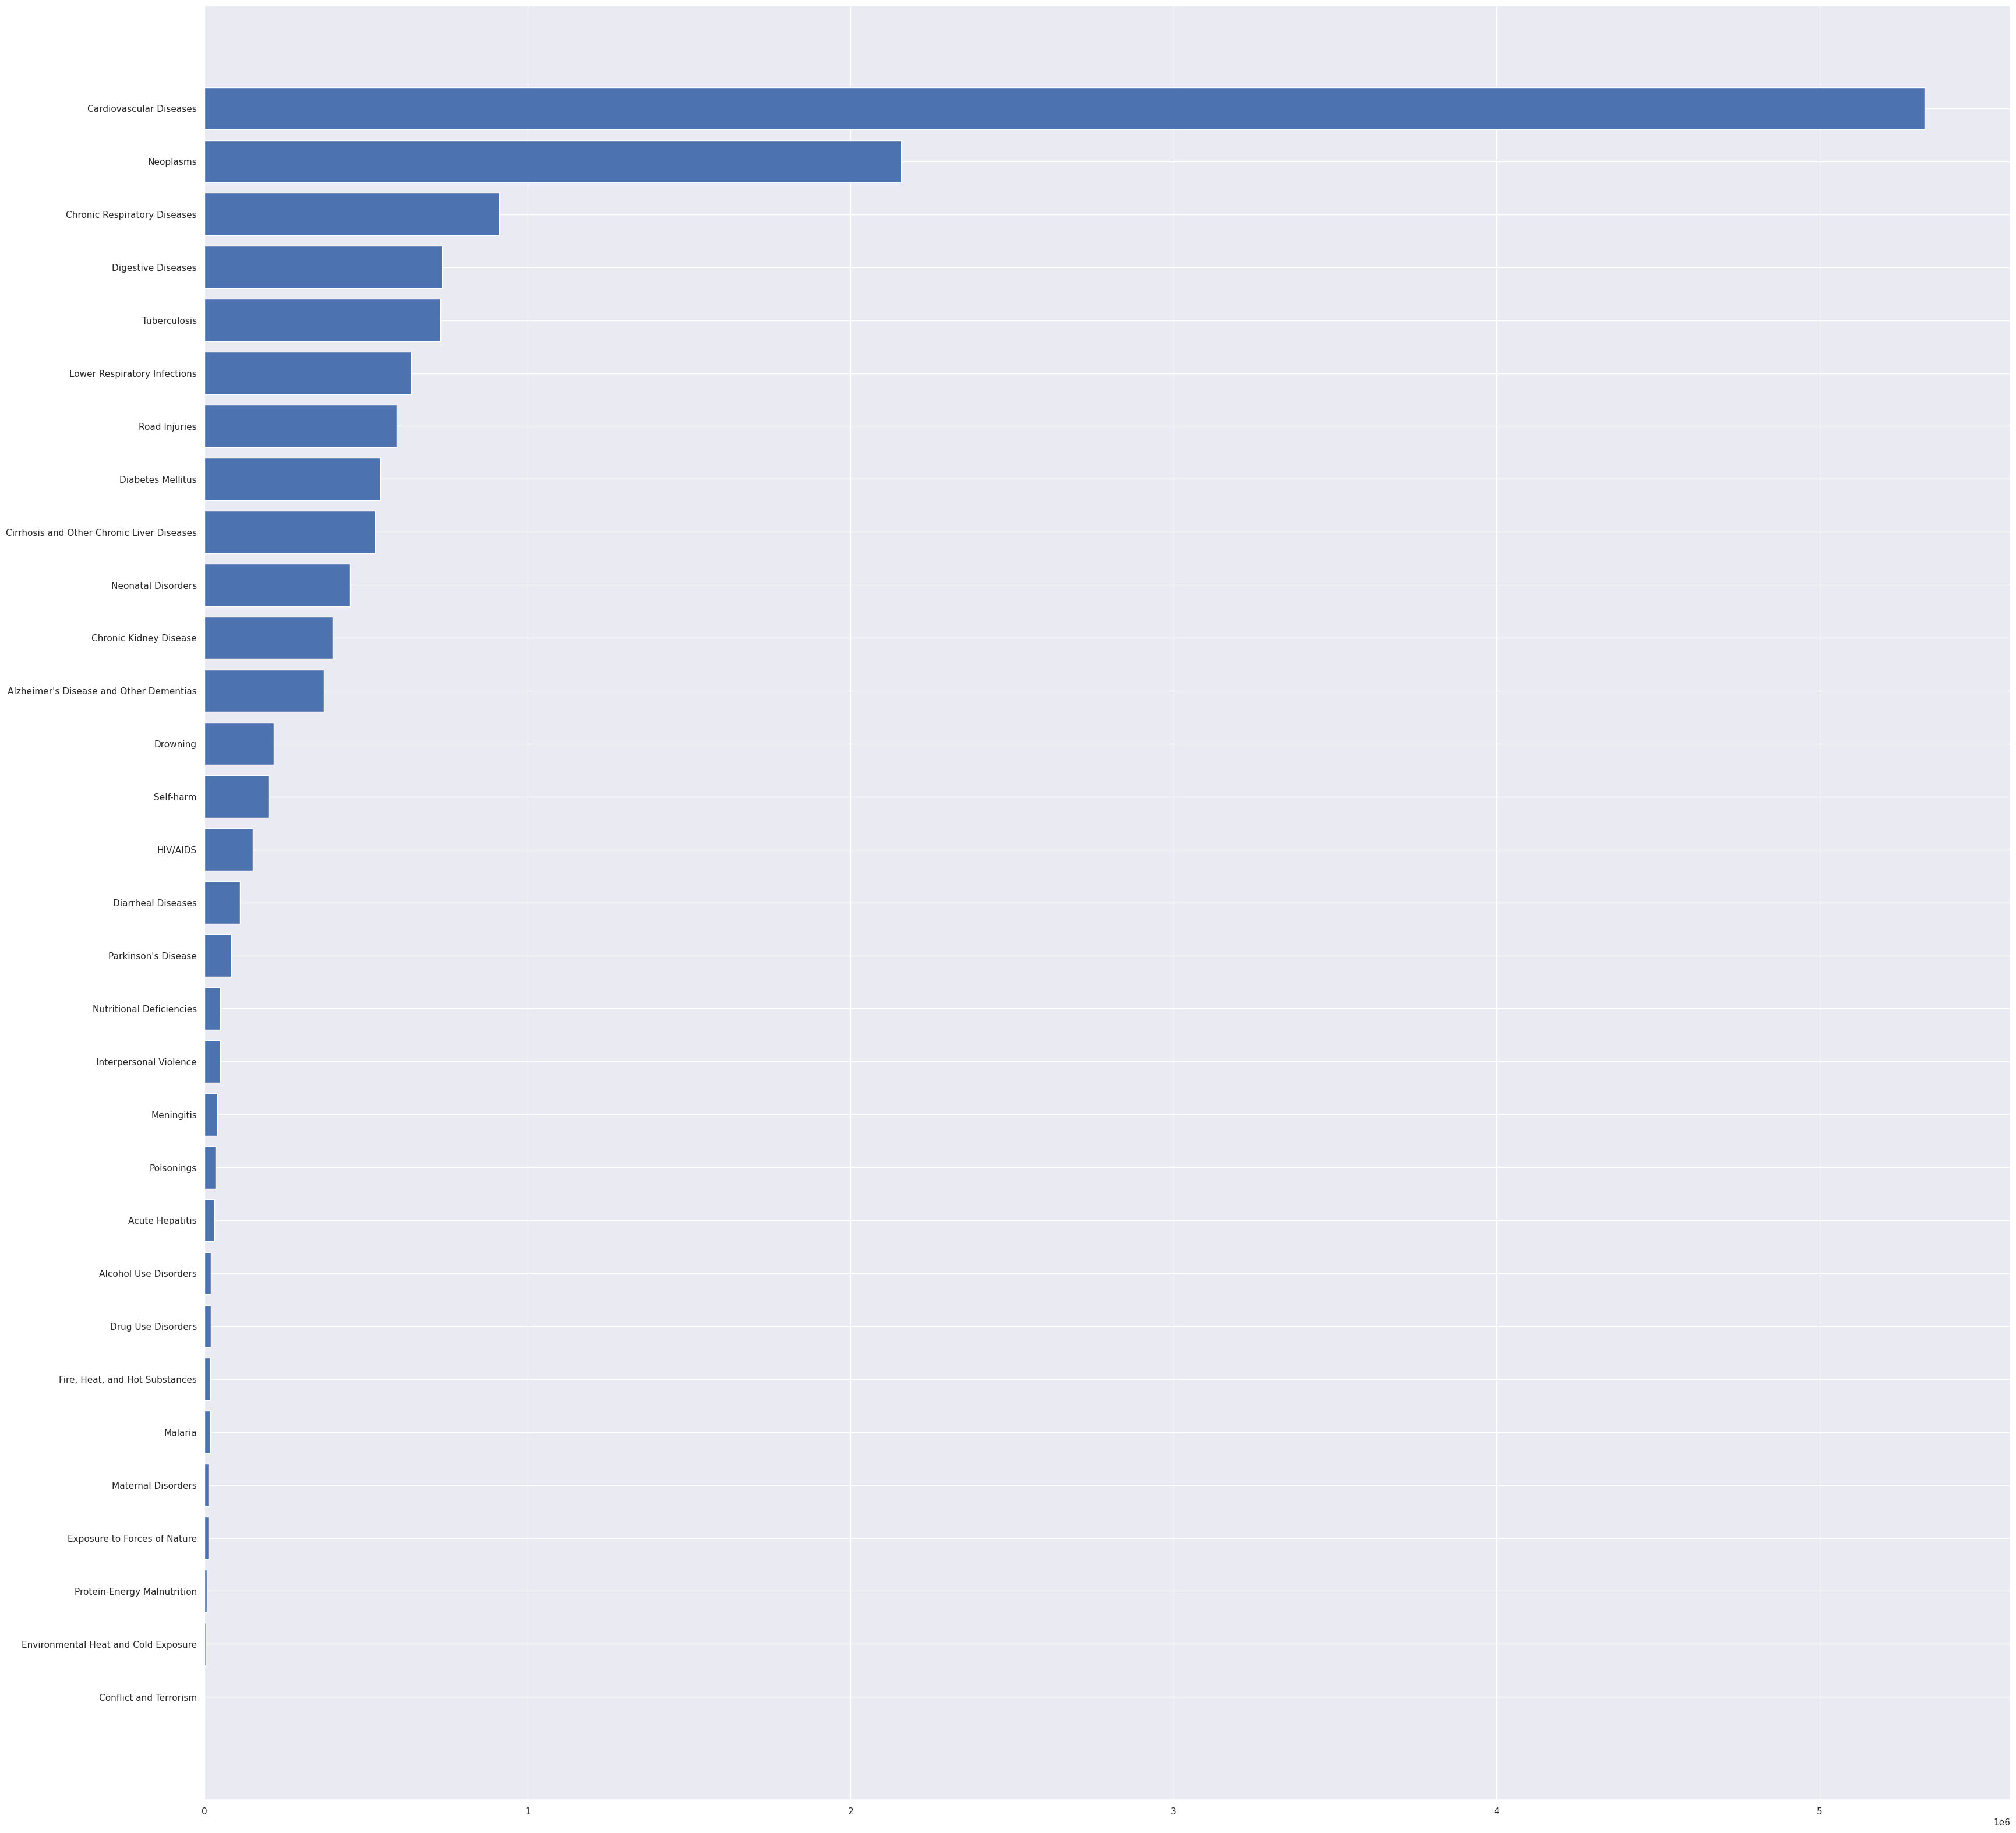

In [115]:
sum_death_vn = vietnamese_death_df.sum(axis = 0)
cause_death_vn = vietnamese_death_df.columns
sum_by_cause_vn = pd.DataFrame({'cause_death': cause_death_vn, 'sum_death': sum_death_vn})
sum_by_cause_vn.sort_values('sum_death',inplace=True, ascending=True)
sum_by_cause_vn = sum_by_cause_vn.reset_index(drop = True)
plt.barh(sum_by_cause_vn['cause_death'], sum_by_cause_vn['sum_death'])
plt.show()

Như vậy, từ biểu đồ, ta thấy có 5 loại nguyên nhân gây tử vong nhiều nhất tại Việt Nam: 
- Bệnh tim mạch (Cardiovascular diseases)
- Khối u (nguyên nhân của ung thư) (Neoplasms)
- Bệnh hô hấp mãn tính (Chnoric Respiratory Diseases)
- Các bệnh về đường tiêu hóa (Digestive Deseases)
- Bệnh lao (Tubeculosis)

Hmm... có vẻ những nguyên nhân này khá hợp lí so với tình hình thực tế ở nước ta.

## 5.3 Tỉ lệ các nguyên nhân tử vong của Việt Nam so với mặt bằng chung thế giới như thế nào ? Visualize biểu đồ so sánh ?

Để trả lời câu hỏi này, ta sẽ vẽ 2 biểu đồ tròn để quan sát tỉ lệ phần trăm các nguyên nhân gây tử vong ở Việt Nam và thể giới, để xem liệu có sự tương đồng (hay khác biệt) nào hay không.

Trước hết, ta sẽ tính tổng ca tử vong do các nguyên nhân khác nhau trên thế giới và lưu vào dataframe đặt tên là sum_by_cause_world. Cách lưu trữ và xử lí tương tự như ở câu 5.2

In [111]:
world_death = cause_of_deaths_df.drop(['Country/Territory', 'Code', 'Year'], axis = 1)
sum_death_world = world_death.sum(axis = 0)
cause_death_world = world_death.columns
sum_by_cause_world = pd.DataFrame({'cause_death': cause_death_world, 'sum_death': sum_death_world})
sum_by_cause_world.sort_values('sum_death',inplace=True, ascending=True)
sum_by_cause_world = sum_by_cause_world.reset_index(drop = True)

Tiếp theo, ta sẽ vẽ 2 biểu đồ tròn để xem tỉ lệ các nguyên nhân tử vong ở Việt Nam và thế giới như thế nào.

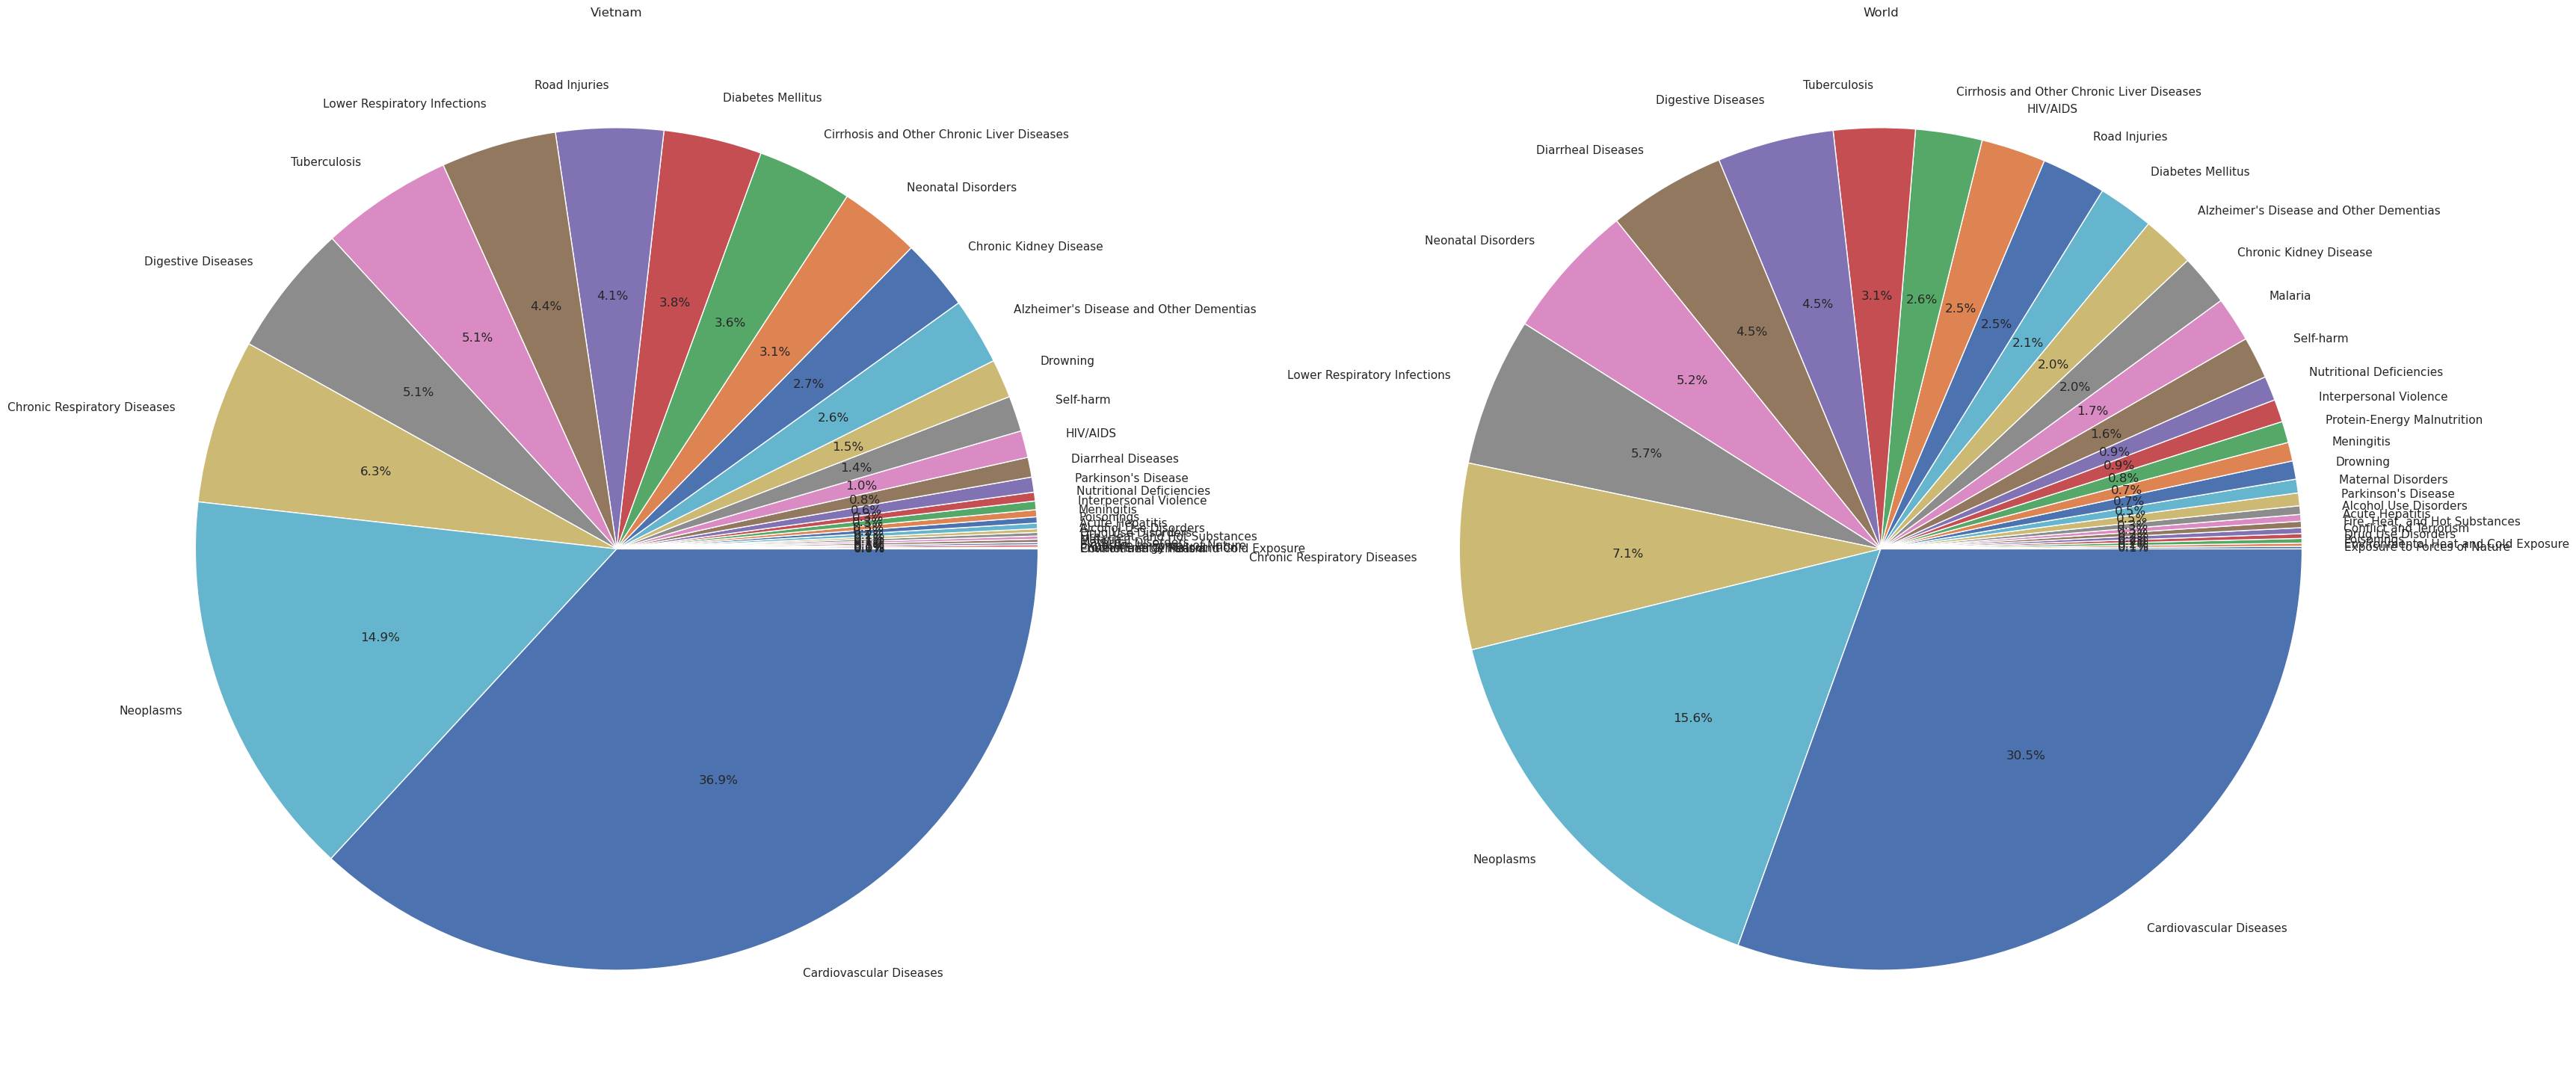

In [119]:
plt.subplot(1, 2, 1)
plt.pie(sum_by_cause_vn['sum_death'], labels = sum_by_cause_vn['cause_death'], autopct = '%1.1f%%')
plt.title("Vietnam")

plt.subplot(1, 2, 2)
plt.pie(sum_by_cause_world['sum_death'], labels = sum_by_cause_world['cause_death'], autopct = '%1.1f%%')
plt.title("World")

plt.show()

**Nhận xét:** 
- Nguyên nhân tử vong của Việt Nam so với thế giới khá giống nhau. 3 nguyên nhân  gây tử vong lớn nhất ở Việt Nam cũng là 3 nguyên nhân gây tử vong lớn nhất trên thế giới (cả 3 nguyên nhân lớn nhất này đã chiếm hơn 50% tỉ lệ tử vong của Việt Nam và thế giới).

- Từ nguyên nhân gây tử vong lớn thứ tư trở đi, Việt Nam đã có sự thay đổi so với thế giới. 
Ở Việt Nam, nguyên nhân gây tử vong lớn thứ tư và thứ năm là Các bệnh về đường tiêu hóa (Digestive Deseases) và Bệnh lao (Tubeculosis), trong khi đó thế giới là Viêm đường hô hấp (Lower Respiratory Infection) và Rối loạn sơ sinh (Neunatal disorders)

- Có vẻ như sự khác nhau này giúp chúng ta suy ra được rằng ở Việt Nam thì các bệnh về đường tiêu hóa và lao xảy ra nhiều hơn so với thế giới vào thời điểm đó. Điều này có lẽ do môi trường sống, hoặc do vấn đề vệ sinh chưa đảm bảo, ...